## Prepare a classification model using Naive Bayes for salary data:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading Training Data

In [2]:
salary_train=pd.read_csv("SalaryData_train.csv")

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Reading Test Data

In [5]:
salary_test=pd.read_csv('SalaryData_test.csv')

In [6]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
salary_test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


# Merging Train and Test Data

In [8]:
salary_data = salary_train.append(salary_test)

In [9]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [11]:
salary_data.shape

(45221, 14)

In [12]:
salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
salary_data.duplicated().sum()

5982

In [14]:
salary_data[salary_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15053,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


# Discription of the Data

In [15]:
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Analyzing Unique Values for each Features

In [16]:
salary_data["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [17]:
salary_data["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
salary_data["native"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [19]:
salary_data["maritalstatus"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
salary_data["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [21]:
salary_data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [22]:
salary_data["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [23]:
salary_data["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
salary_data["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [25]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Doing Label Encoder On Target Column

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
salary_data["Salary"]=encoder.fit_transform(salary_data["Salary"])

In [28]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


# Using Barplot To Analyze Data

<AxesSubplot:xlabel='Salary', ylabel='age'>

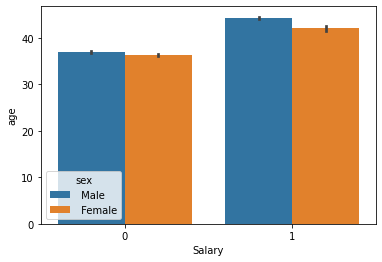

In [29]:
sns.barplot("Salary","age",hue="sex",data=salary_data)

# Observation:
In class 0 the age between 30 to 40 male and female are having equal amount of salary which is more than or equal to 50k and in class 1 the males having more than age of 40 having less salary than 50k  as compared to females

<AxesSubplot:xlabel='Salary', ylabel='workclass'>

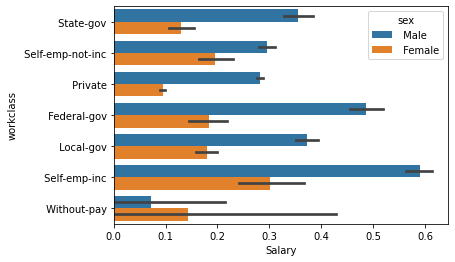

In [30]:
sns.barplot("Salary","workclass",hue='sex',data=salary_data)

# Observation:
In each sector of the working class Males are having more salaries than female except without pay females are having more salaries and we can see the outliers as well 

<AxesSubplot:xlabel='Salary', ylabel='education'>

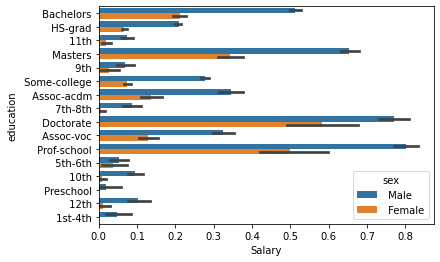

In [31]:
sns.barplot("Salary","education",hue="sex",data=salary_data)

# Observation:
In education sector also males are having more salaries than female and we can see some outliers as well

<AxesSubplot:xlabel='Salary', ylabel='educationno'>

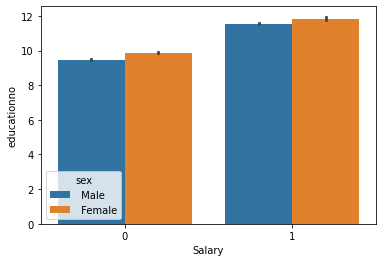

In [32]:
sns.barplot("Salary","educationno",hue="sex",data=salary_data)

# Observation:
In both the classes the females are having slightly higher salaries than males

<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

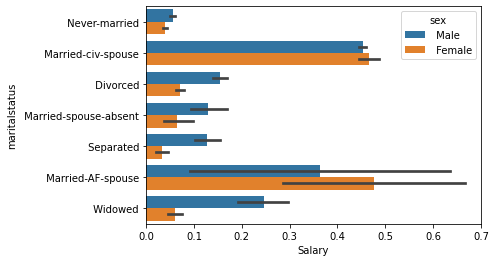

In [33]:
sns.barplot("Salary","maritalstatus",hue='sex',data=salary_data)

# Observation:
In Married-civ-spouse and Married-AF_spouse the females are having high salaries than the males but in rest of the categories the males are having High salaries than females

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

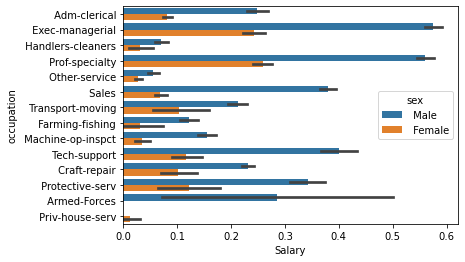

In [34]:
sns.barplot('Salary','occupation',hue="sex",data=salary_data)

# Observation:
In occupation the males are having high salaries than females and also seeing some outliers

<AxesSubplot:xlabel='Salary', ylabel='relationship'>

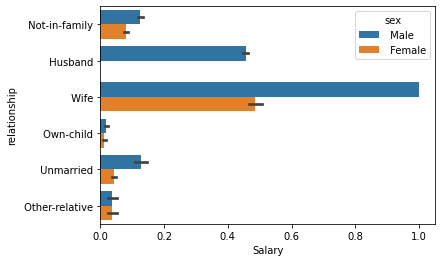

In [35]:
sns.barplot("Salary","relationship",hue='sex',data=salary_data)

# Observation:
In relationships the males are having more salaries than females

<AxesSubplot:xlabel='Salary', ylabel='race'>

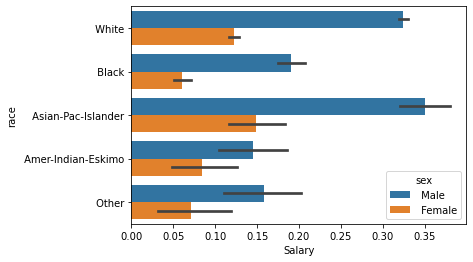

In [36]:
sns.barplot('Salary',"race",hue='sex',data=salary_data)

# Observation:
In race the males are having more salaries than females

<AxesSubplot:xlabel='Salary', ylabel='capitalgain'>

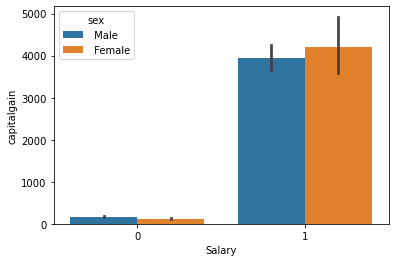

In [37]:
sns.barplot("Salary","capitalgain",hue="sex",data=salary_data)

# Observation:
In capitalgain the males are less capital gain than Females

<AxesSubplot:xlabel='Salary', ylabel='capitalloss'>

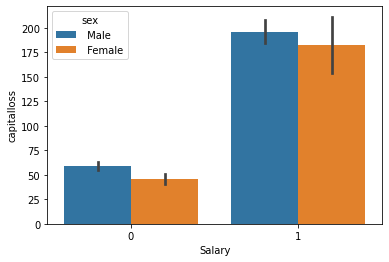

In [38]:
sns.barplot('Salary',"capitalloss",hue="sex",data=salary_data)

# Observation:
The males are having more capiral loss than females

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

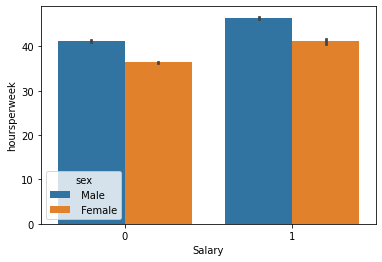

In [39]:
sns.barplot("Salary","hoursperweek",hue='sex',data=salary_data)

# Observation:
In hours per week the males are having more salaries than females

<AxesSubplot:xlabel='Salary', ylabel='native'>

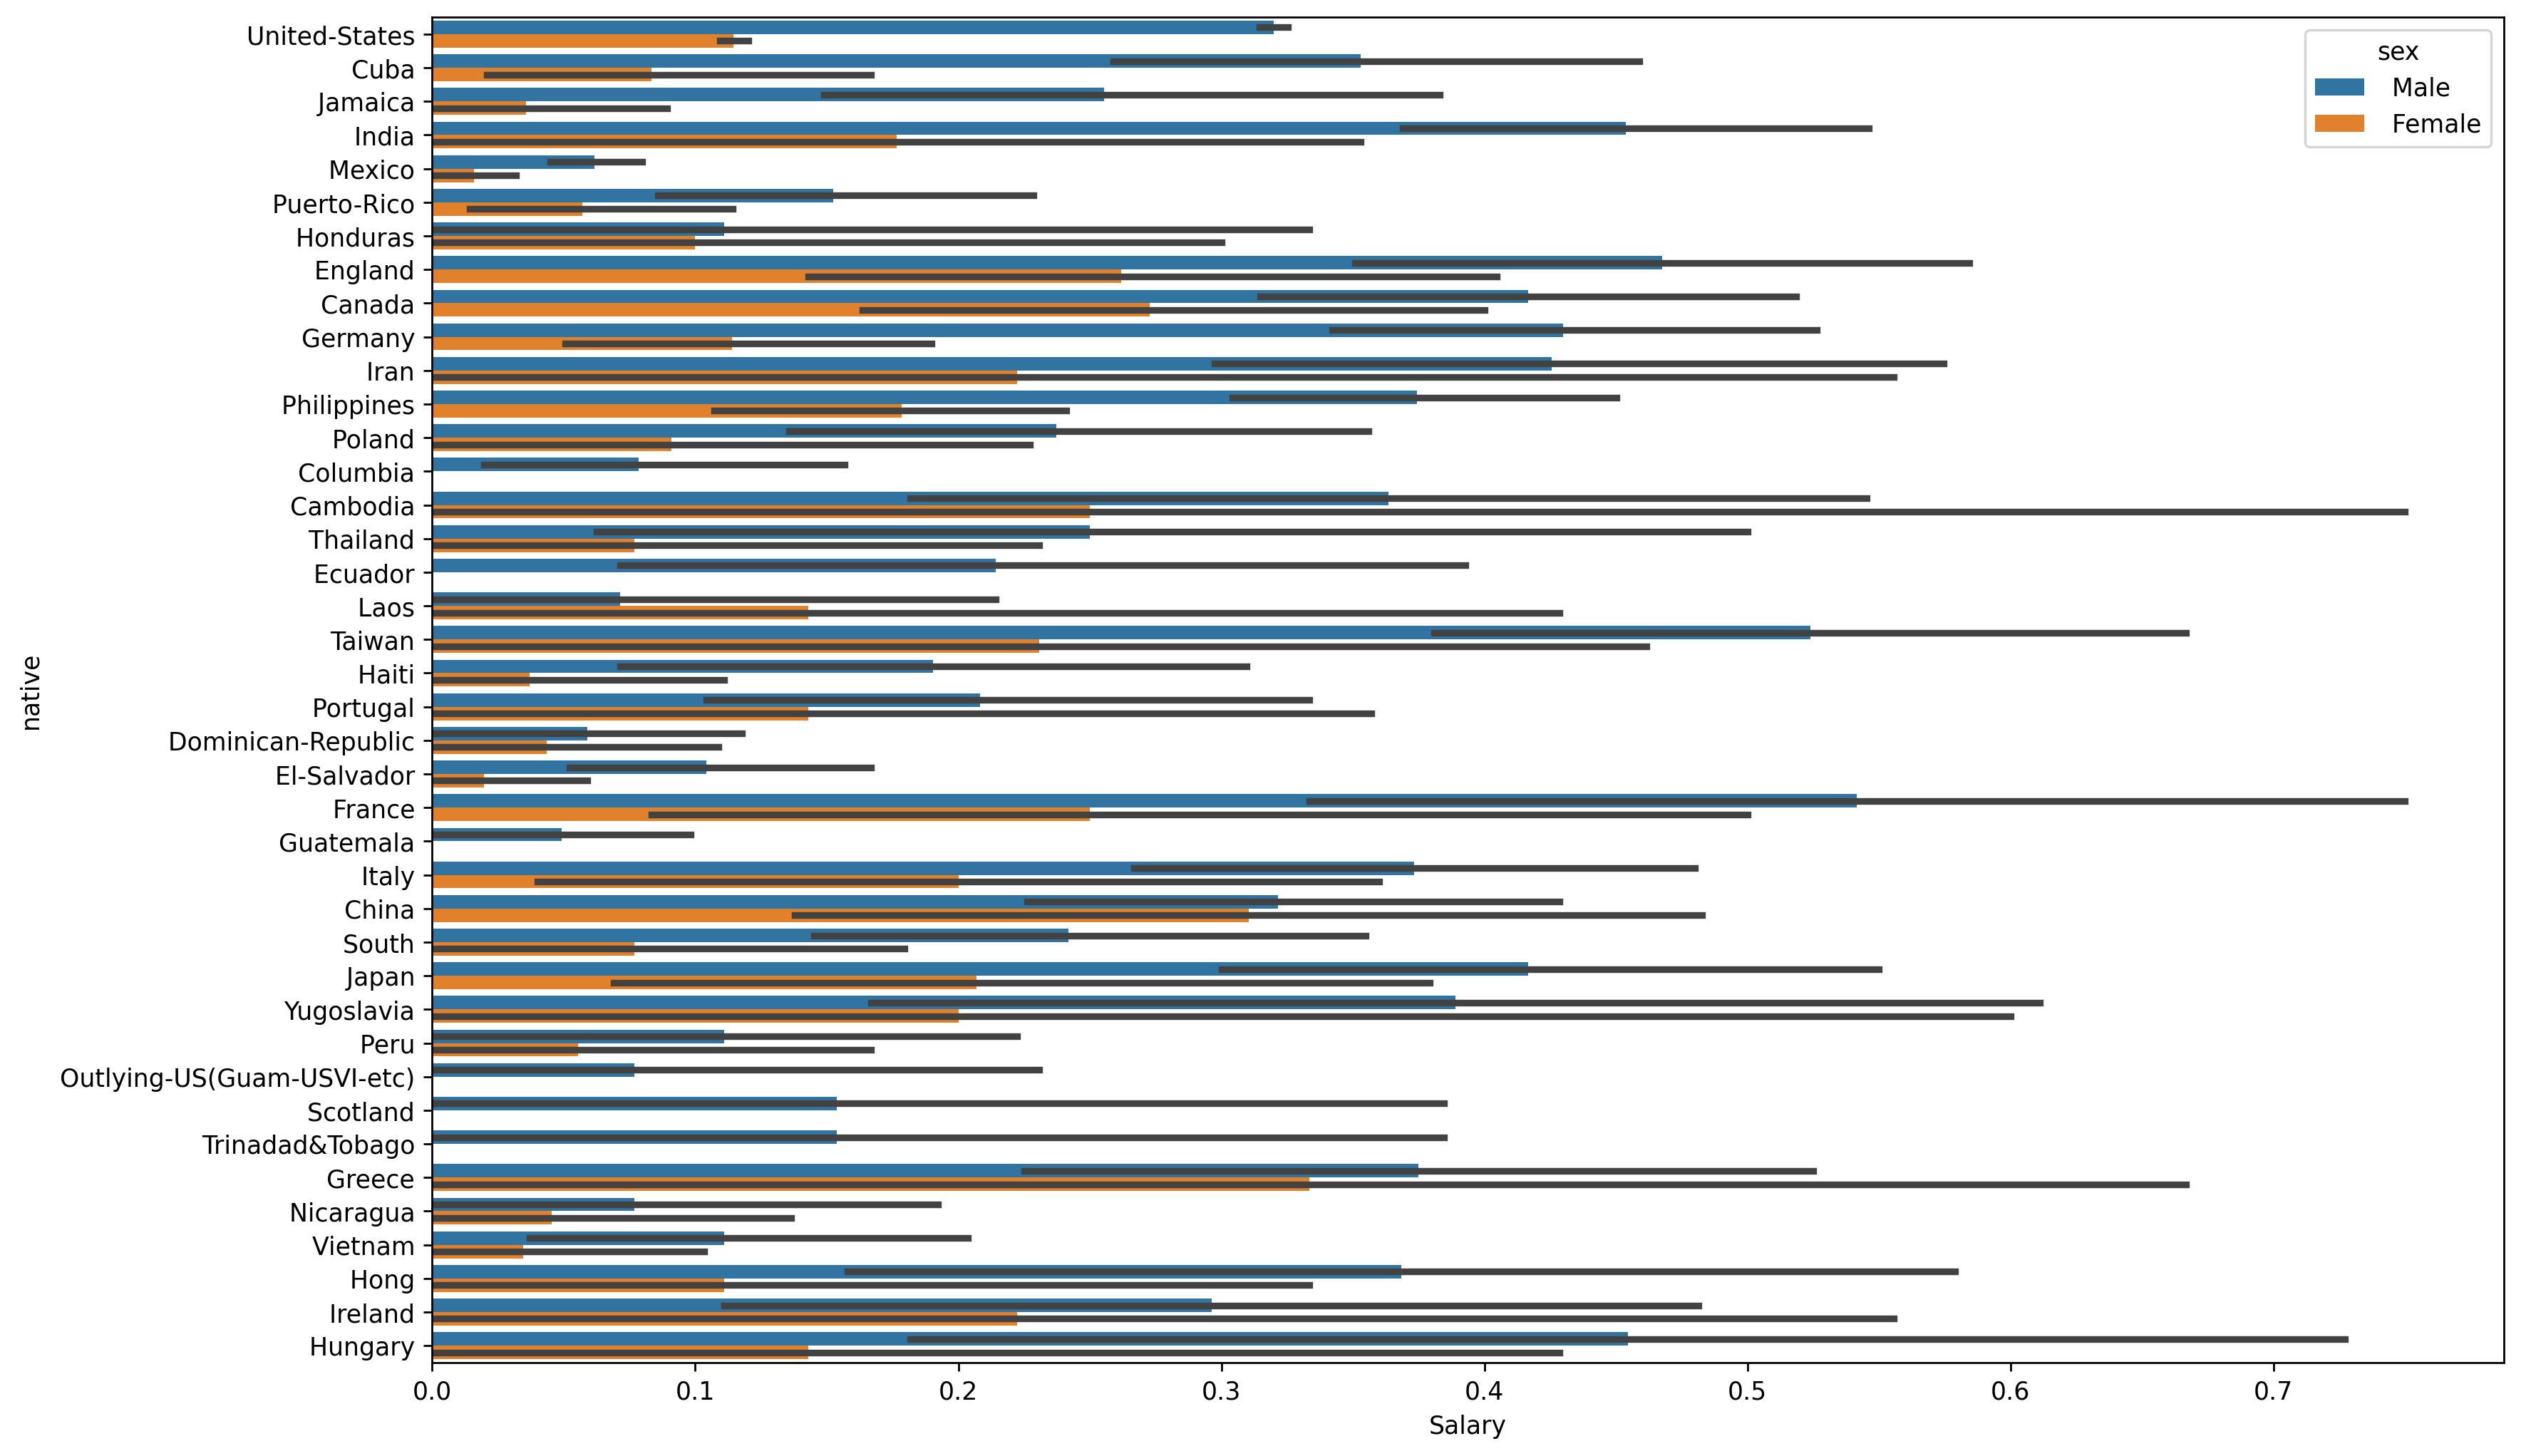

In [40]:
plt.figure(figsize=(15,10),dpi=250)
sns.barplot('Salary',"native",hue="sex",data=salary_data)

# Observation:
As we can see that most of the native regions are showing that the males are having more salaries than females

# Countplot

<AxesSubplot:xlabel='age', ylabel='count'>

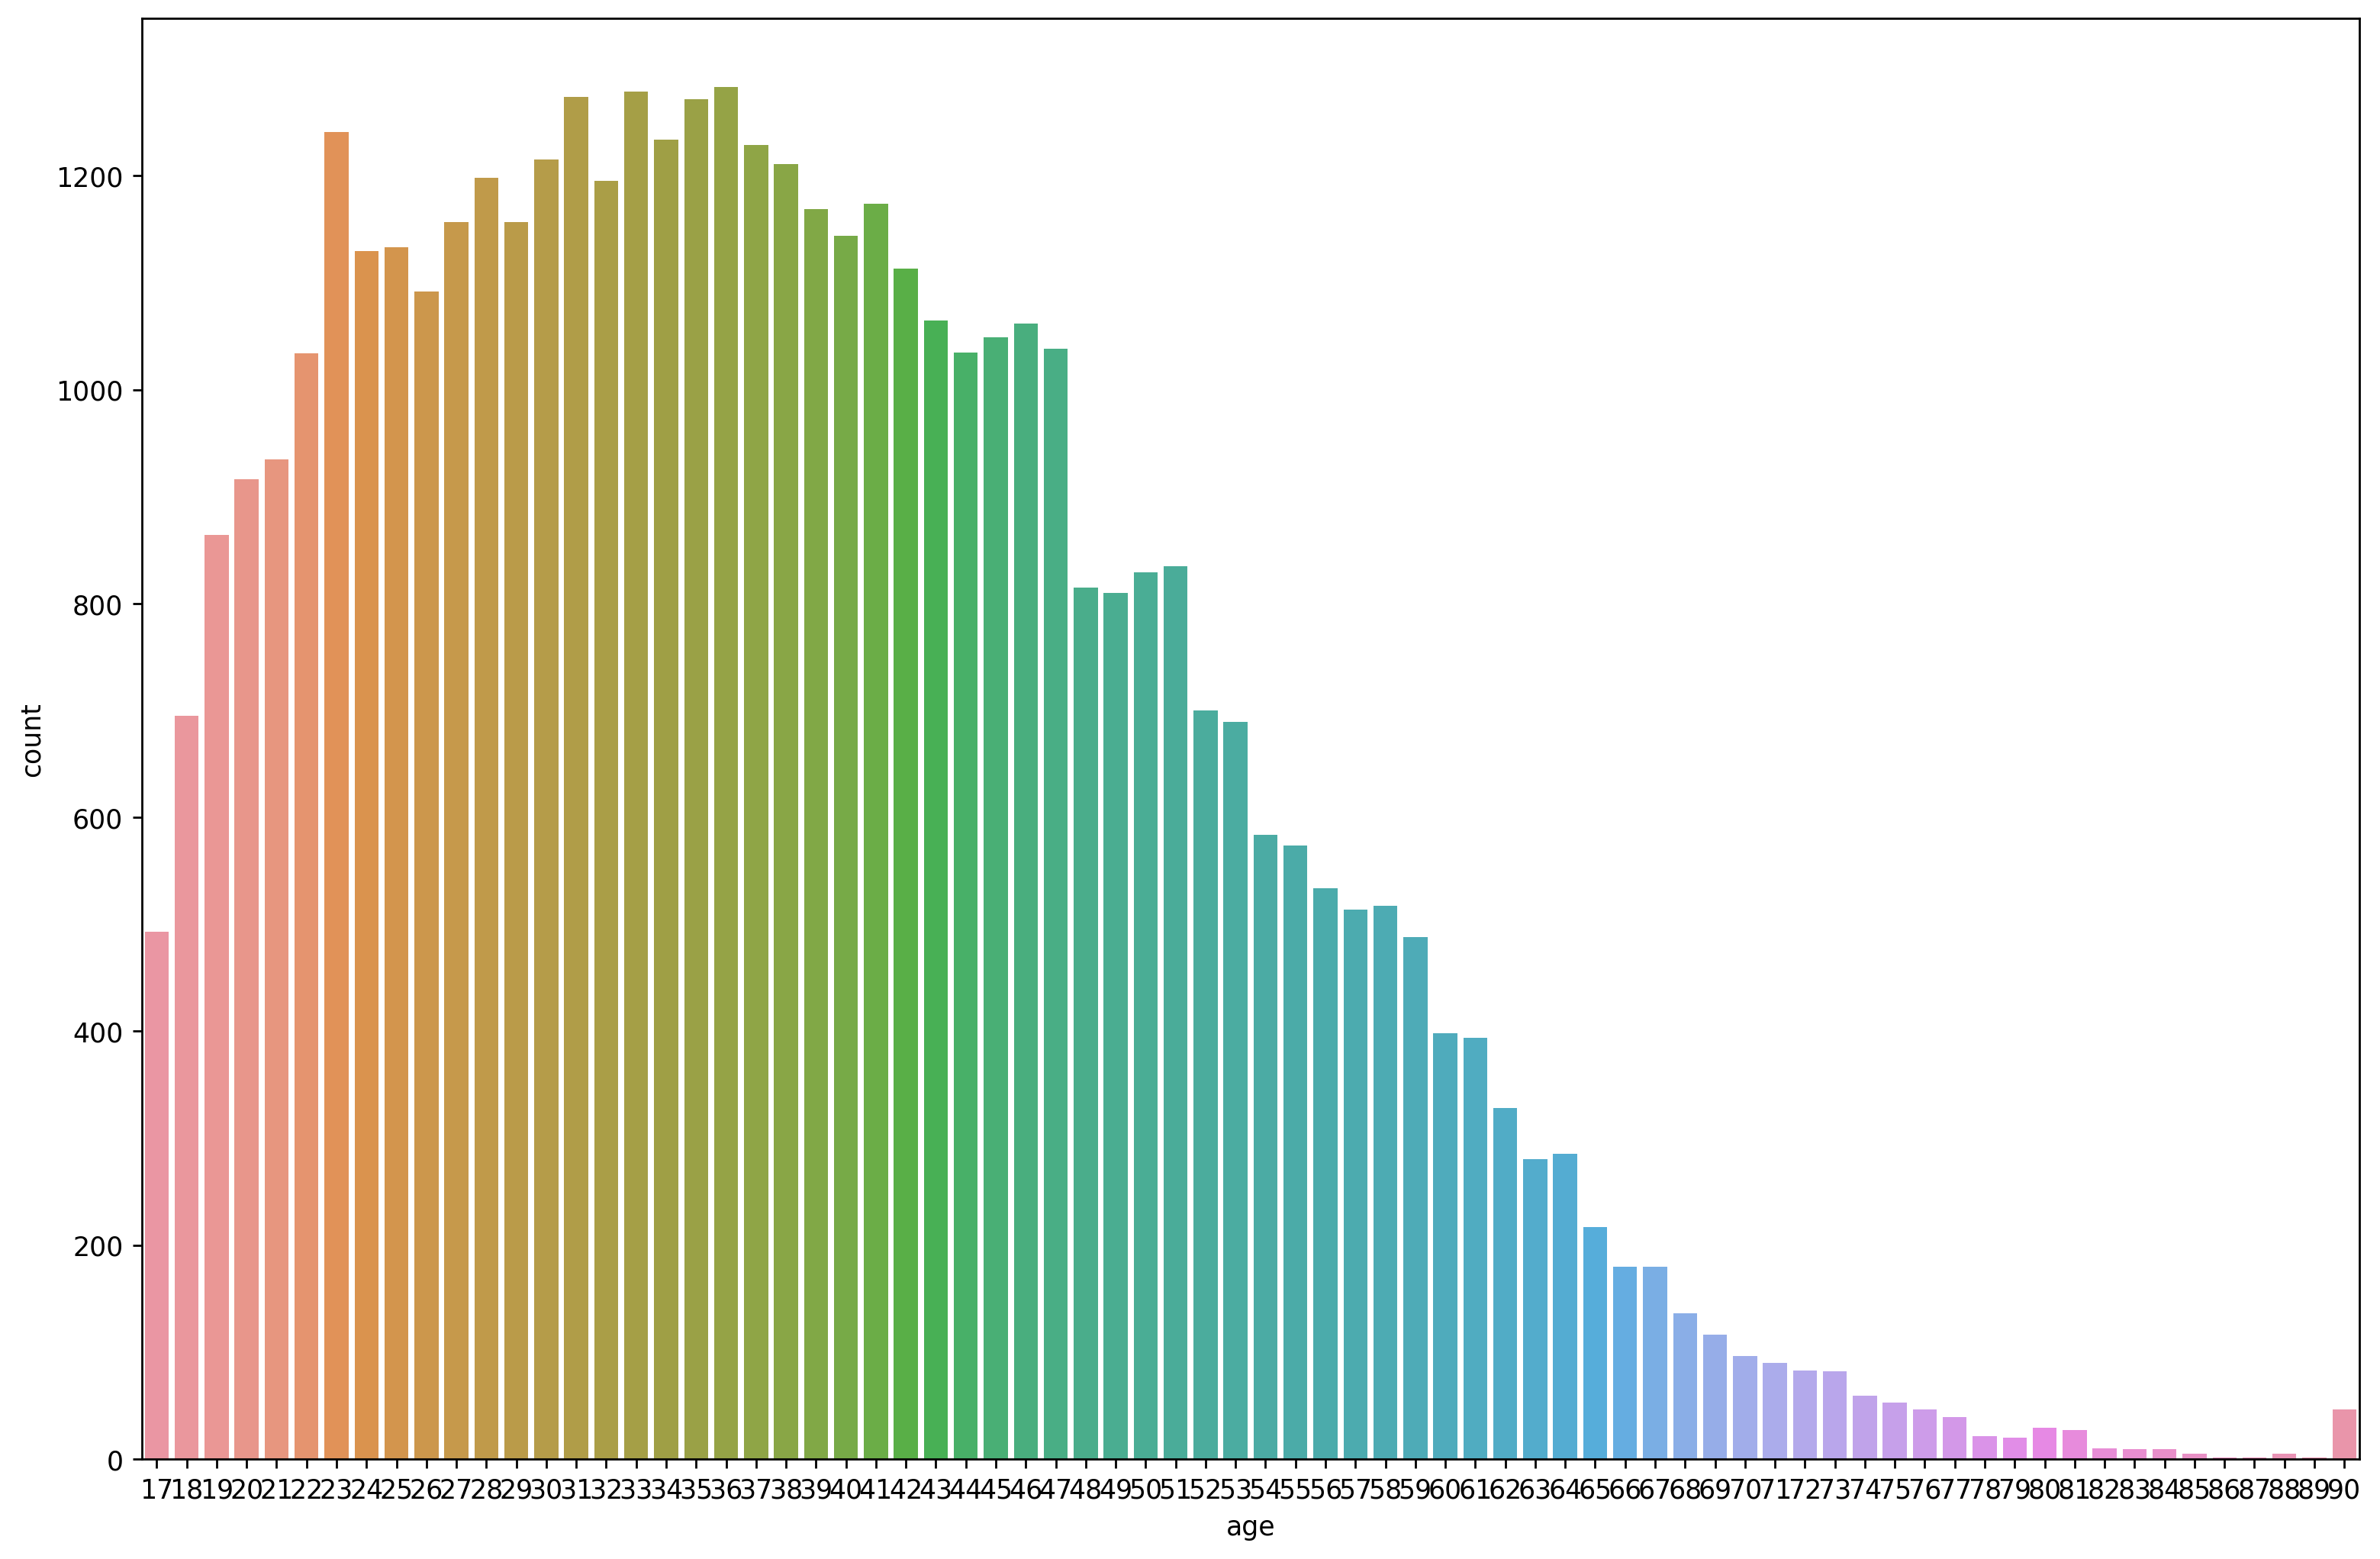

In [41]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot("age",data=salary_data)

<AxesSubplot:xlabel='workclass', ylabel='count'>

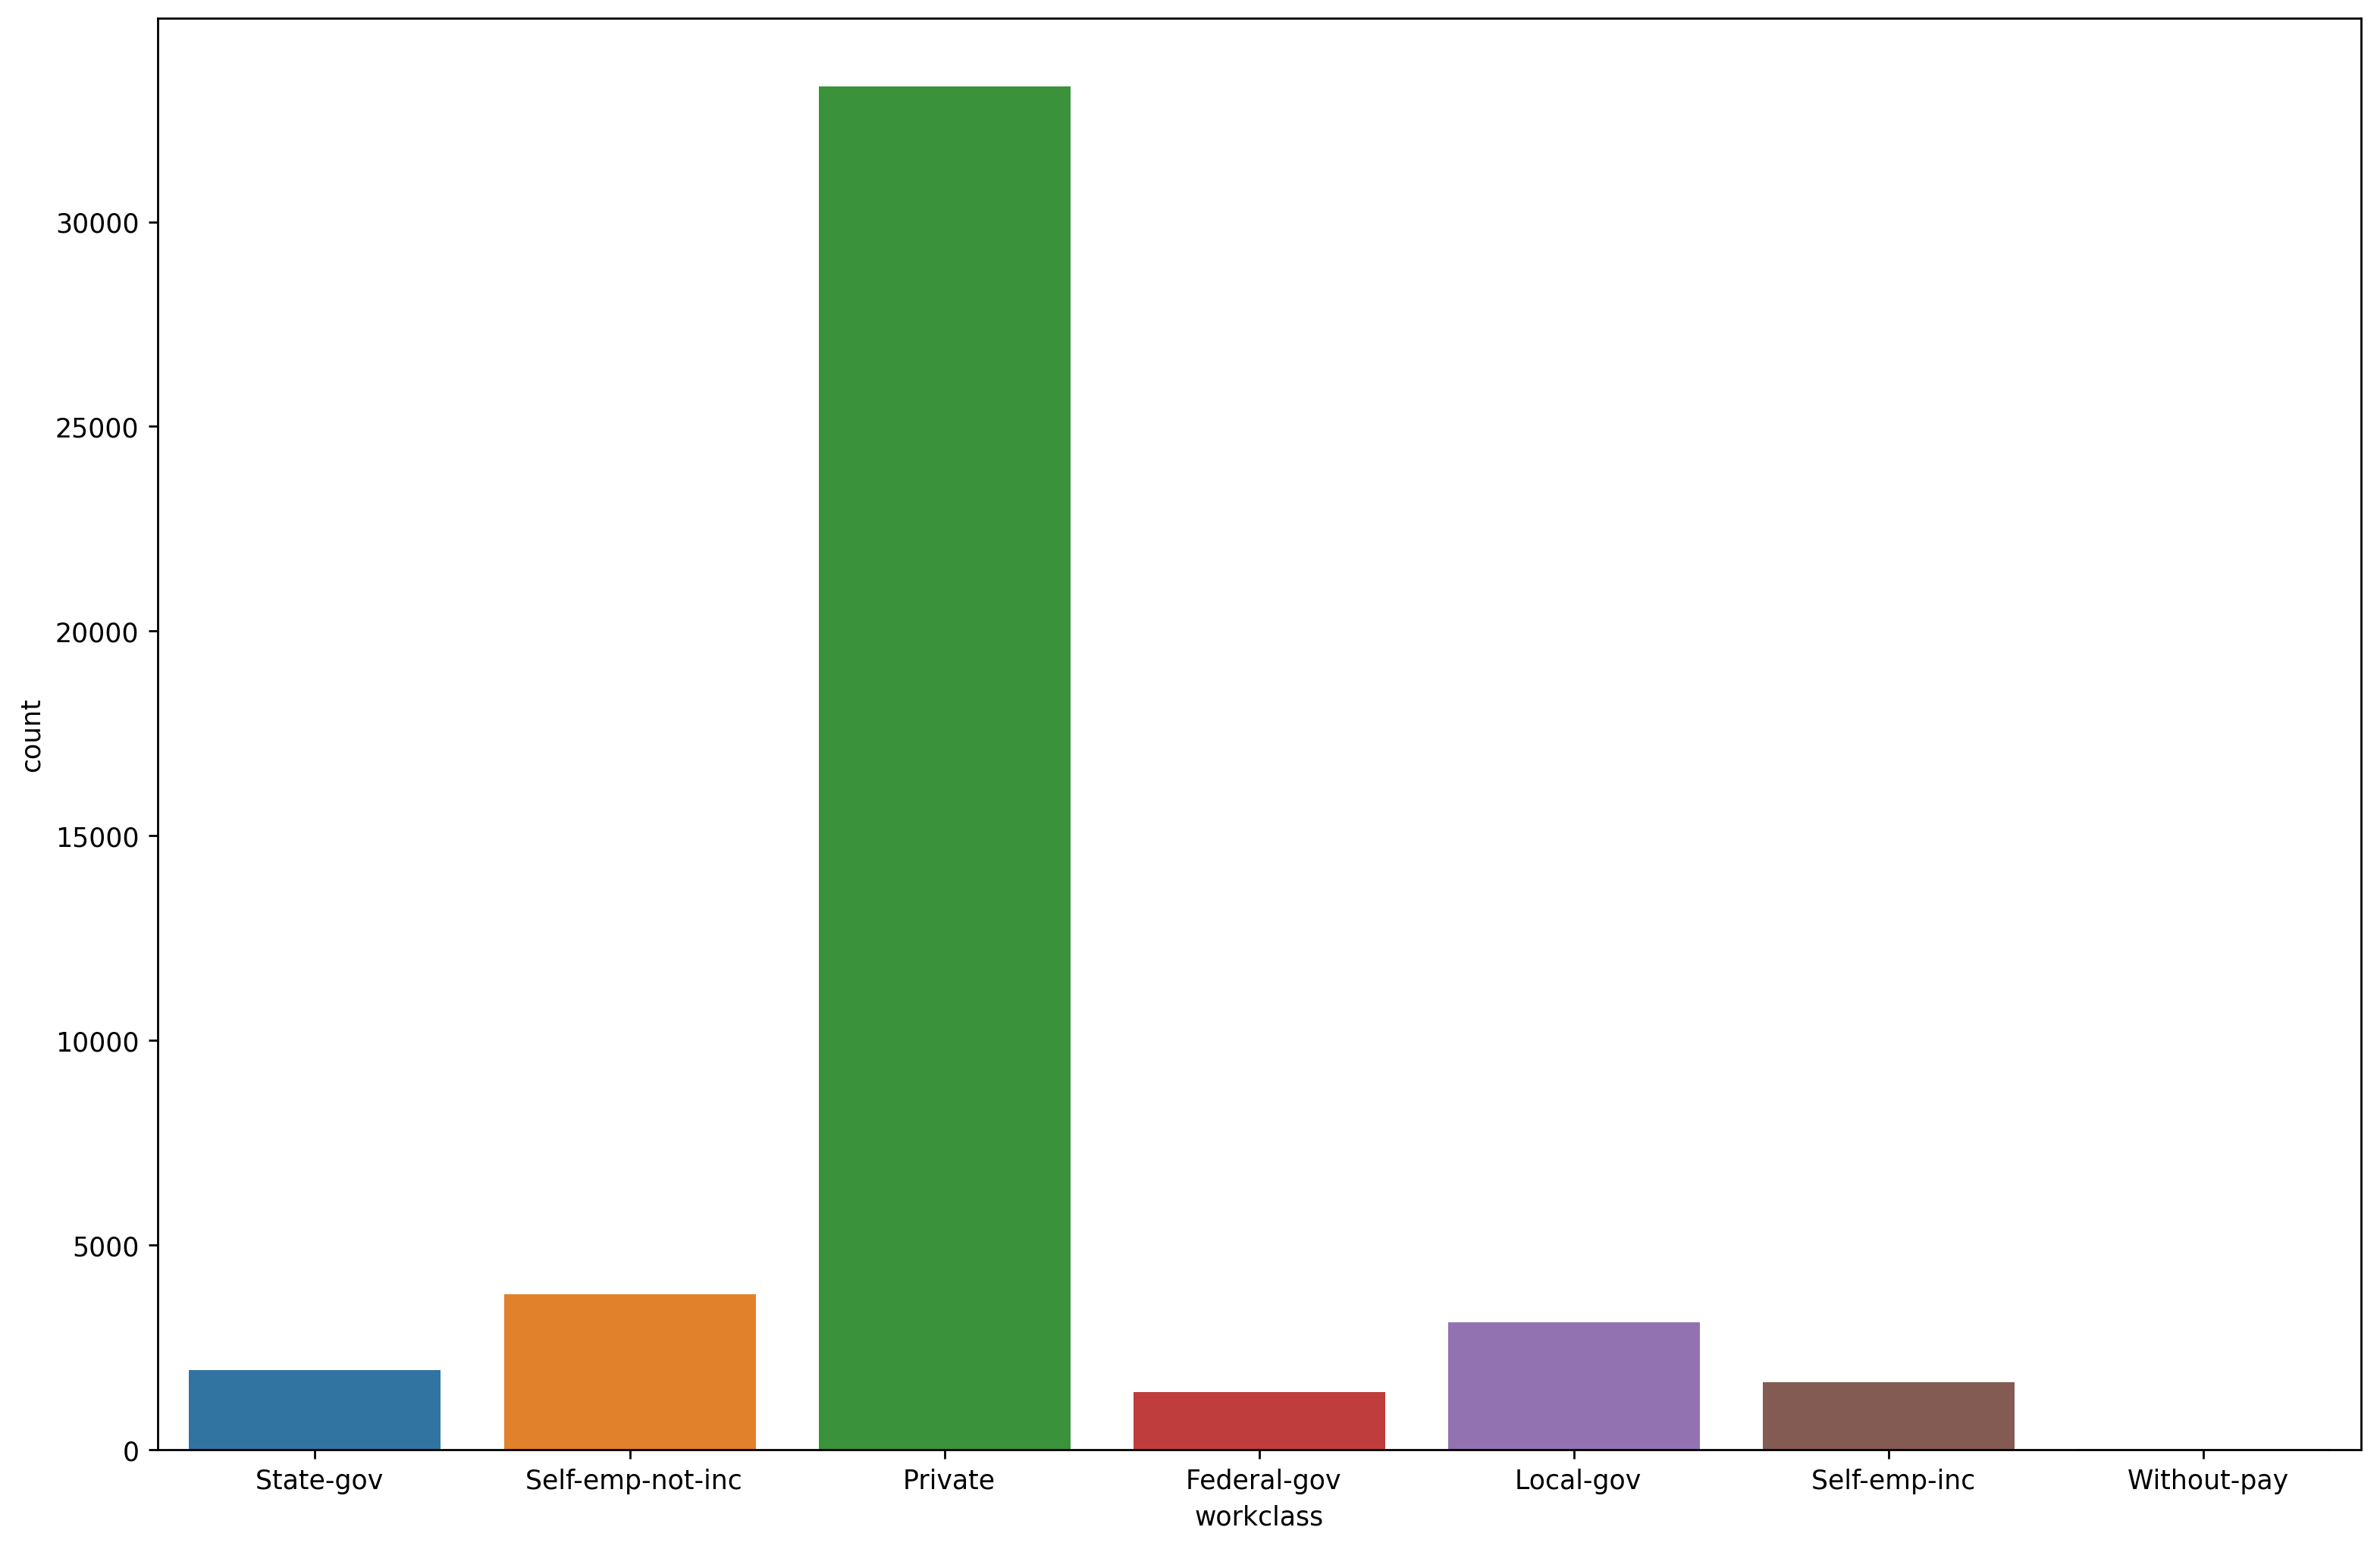

In [42]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot('workclass',data=salary_data)

<AxesSubplot:xlabel='education', ylabel='count'>

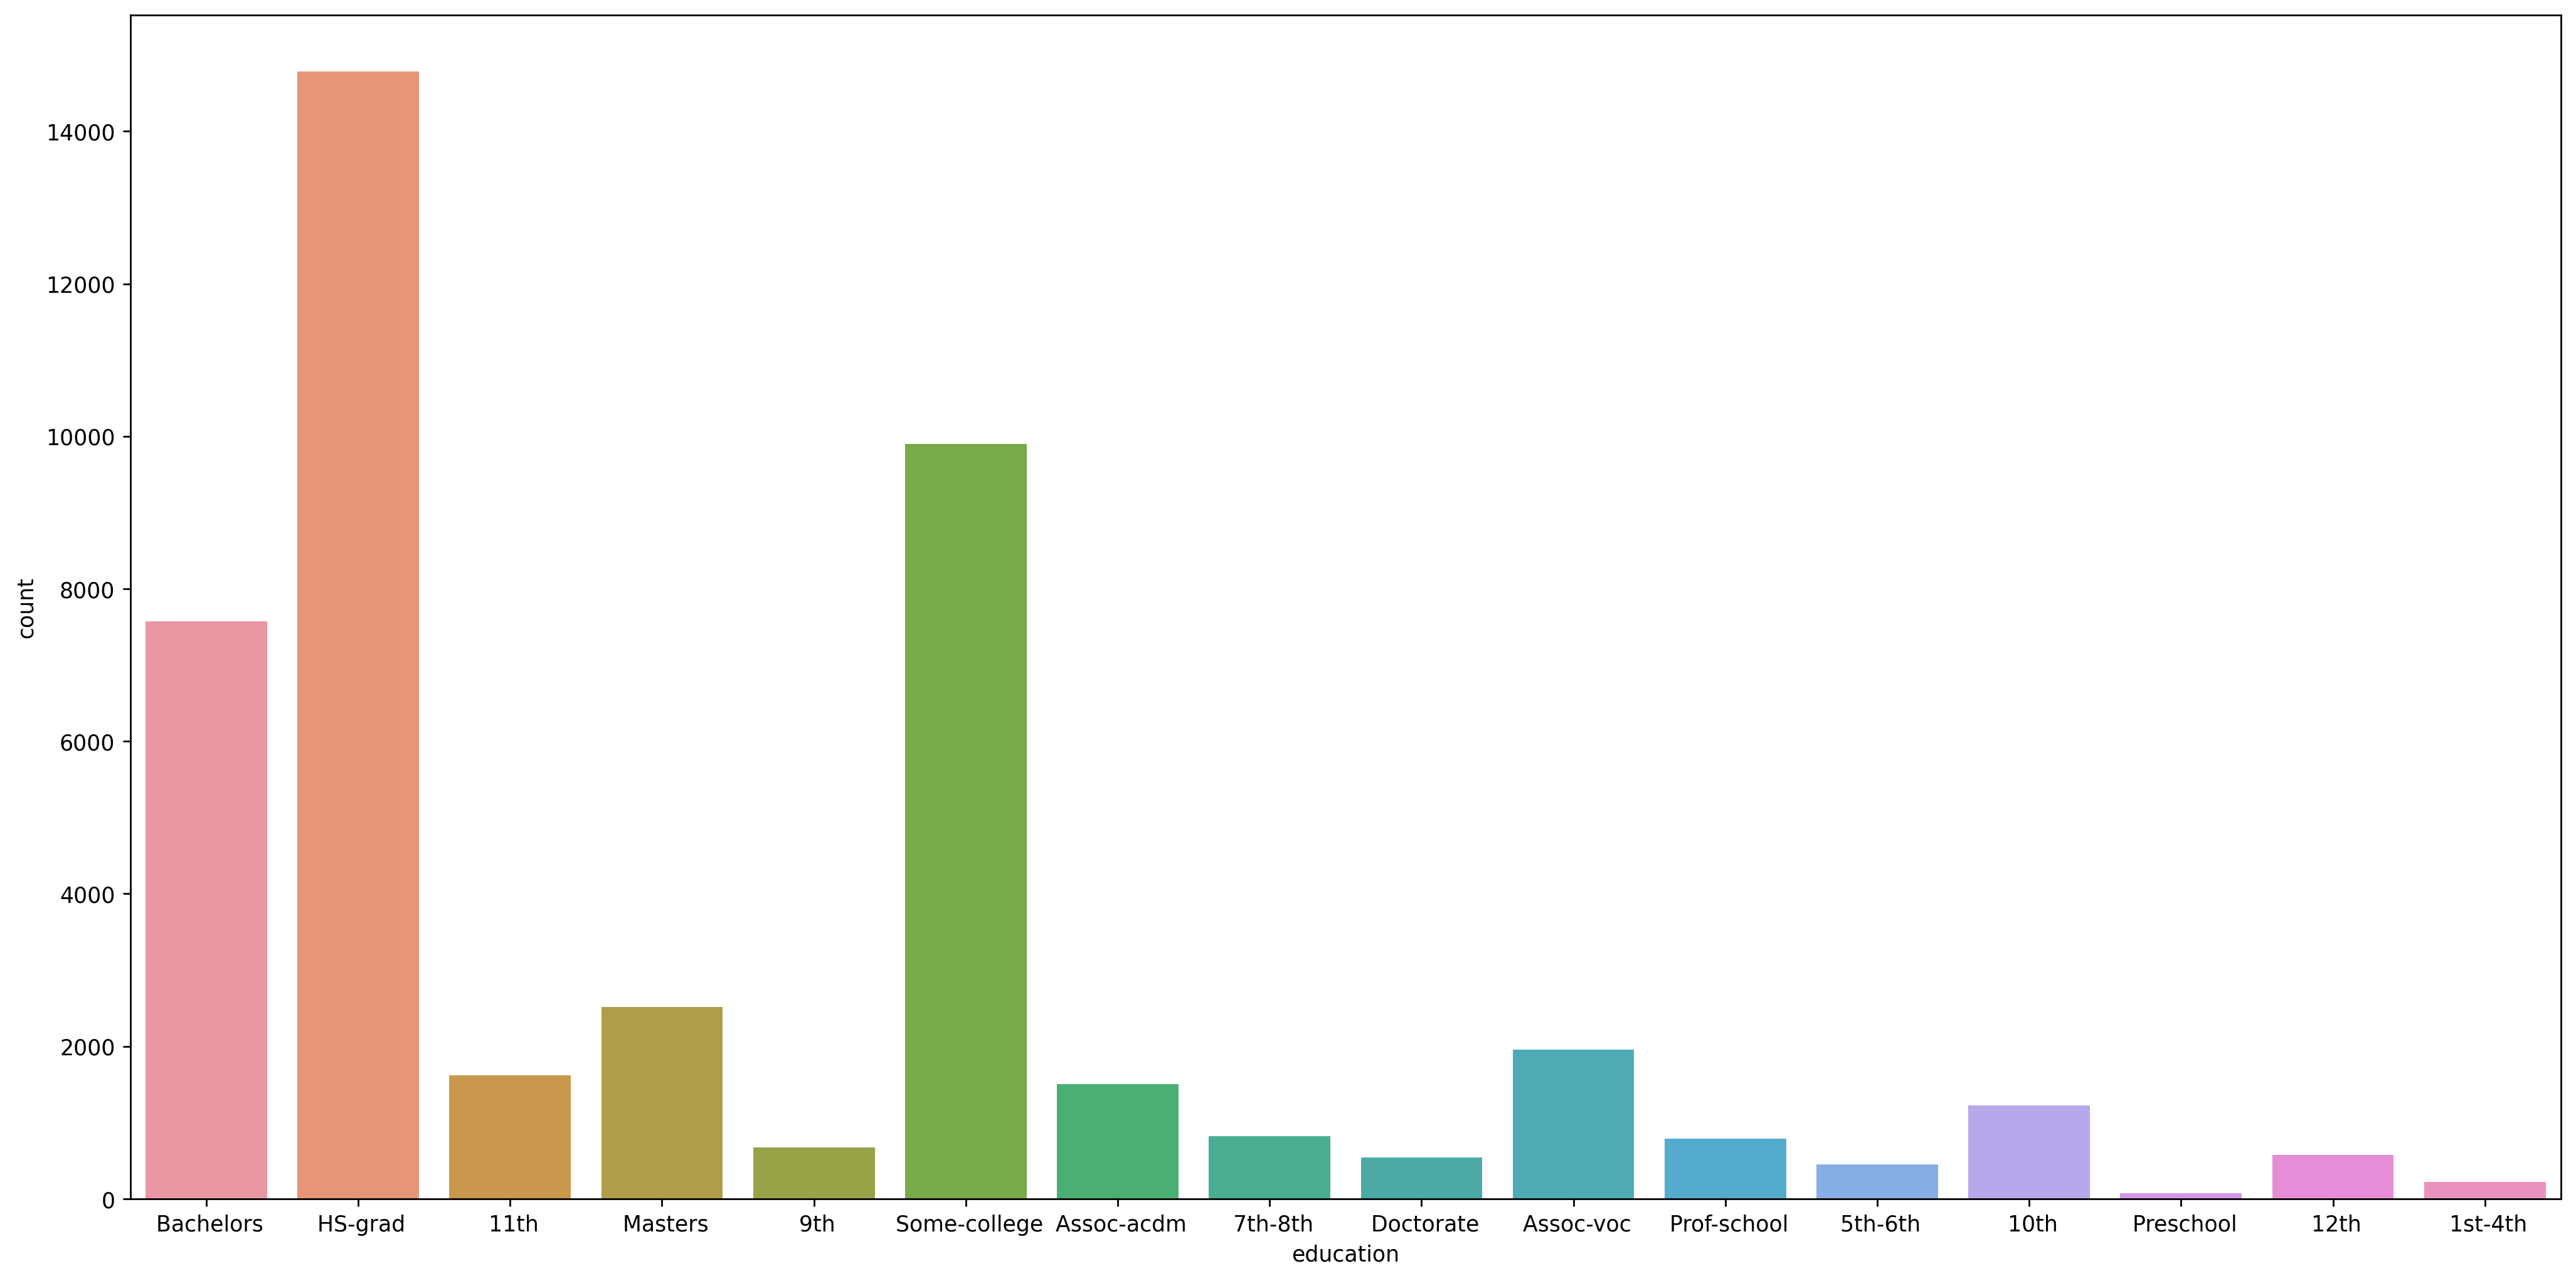

In [43]:
plt.figure(figsize=(20,10),dpi=250)
sns.countplot("education",data=salary_data)

<AxesSubplot:xlabel='educationno', ylabel='count'>

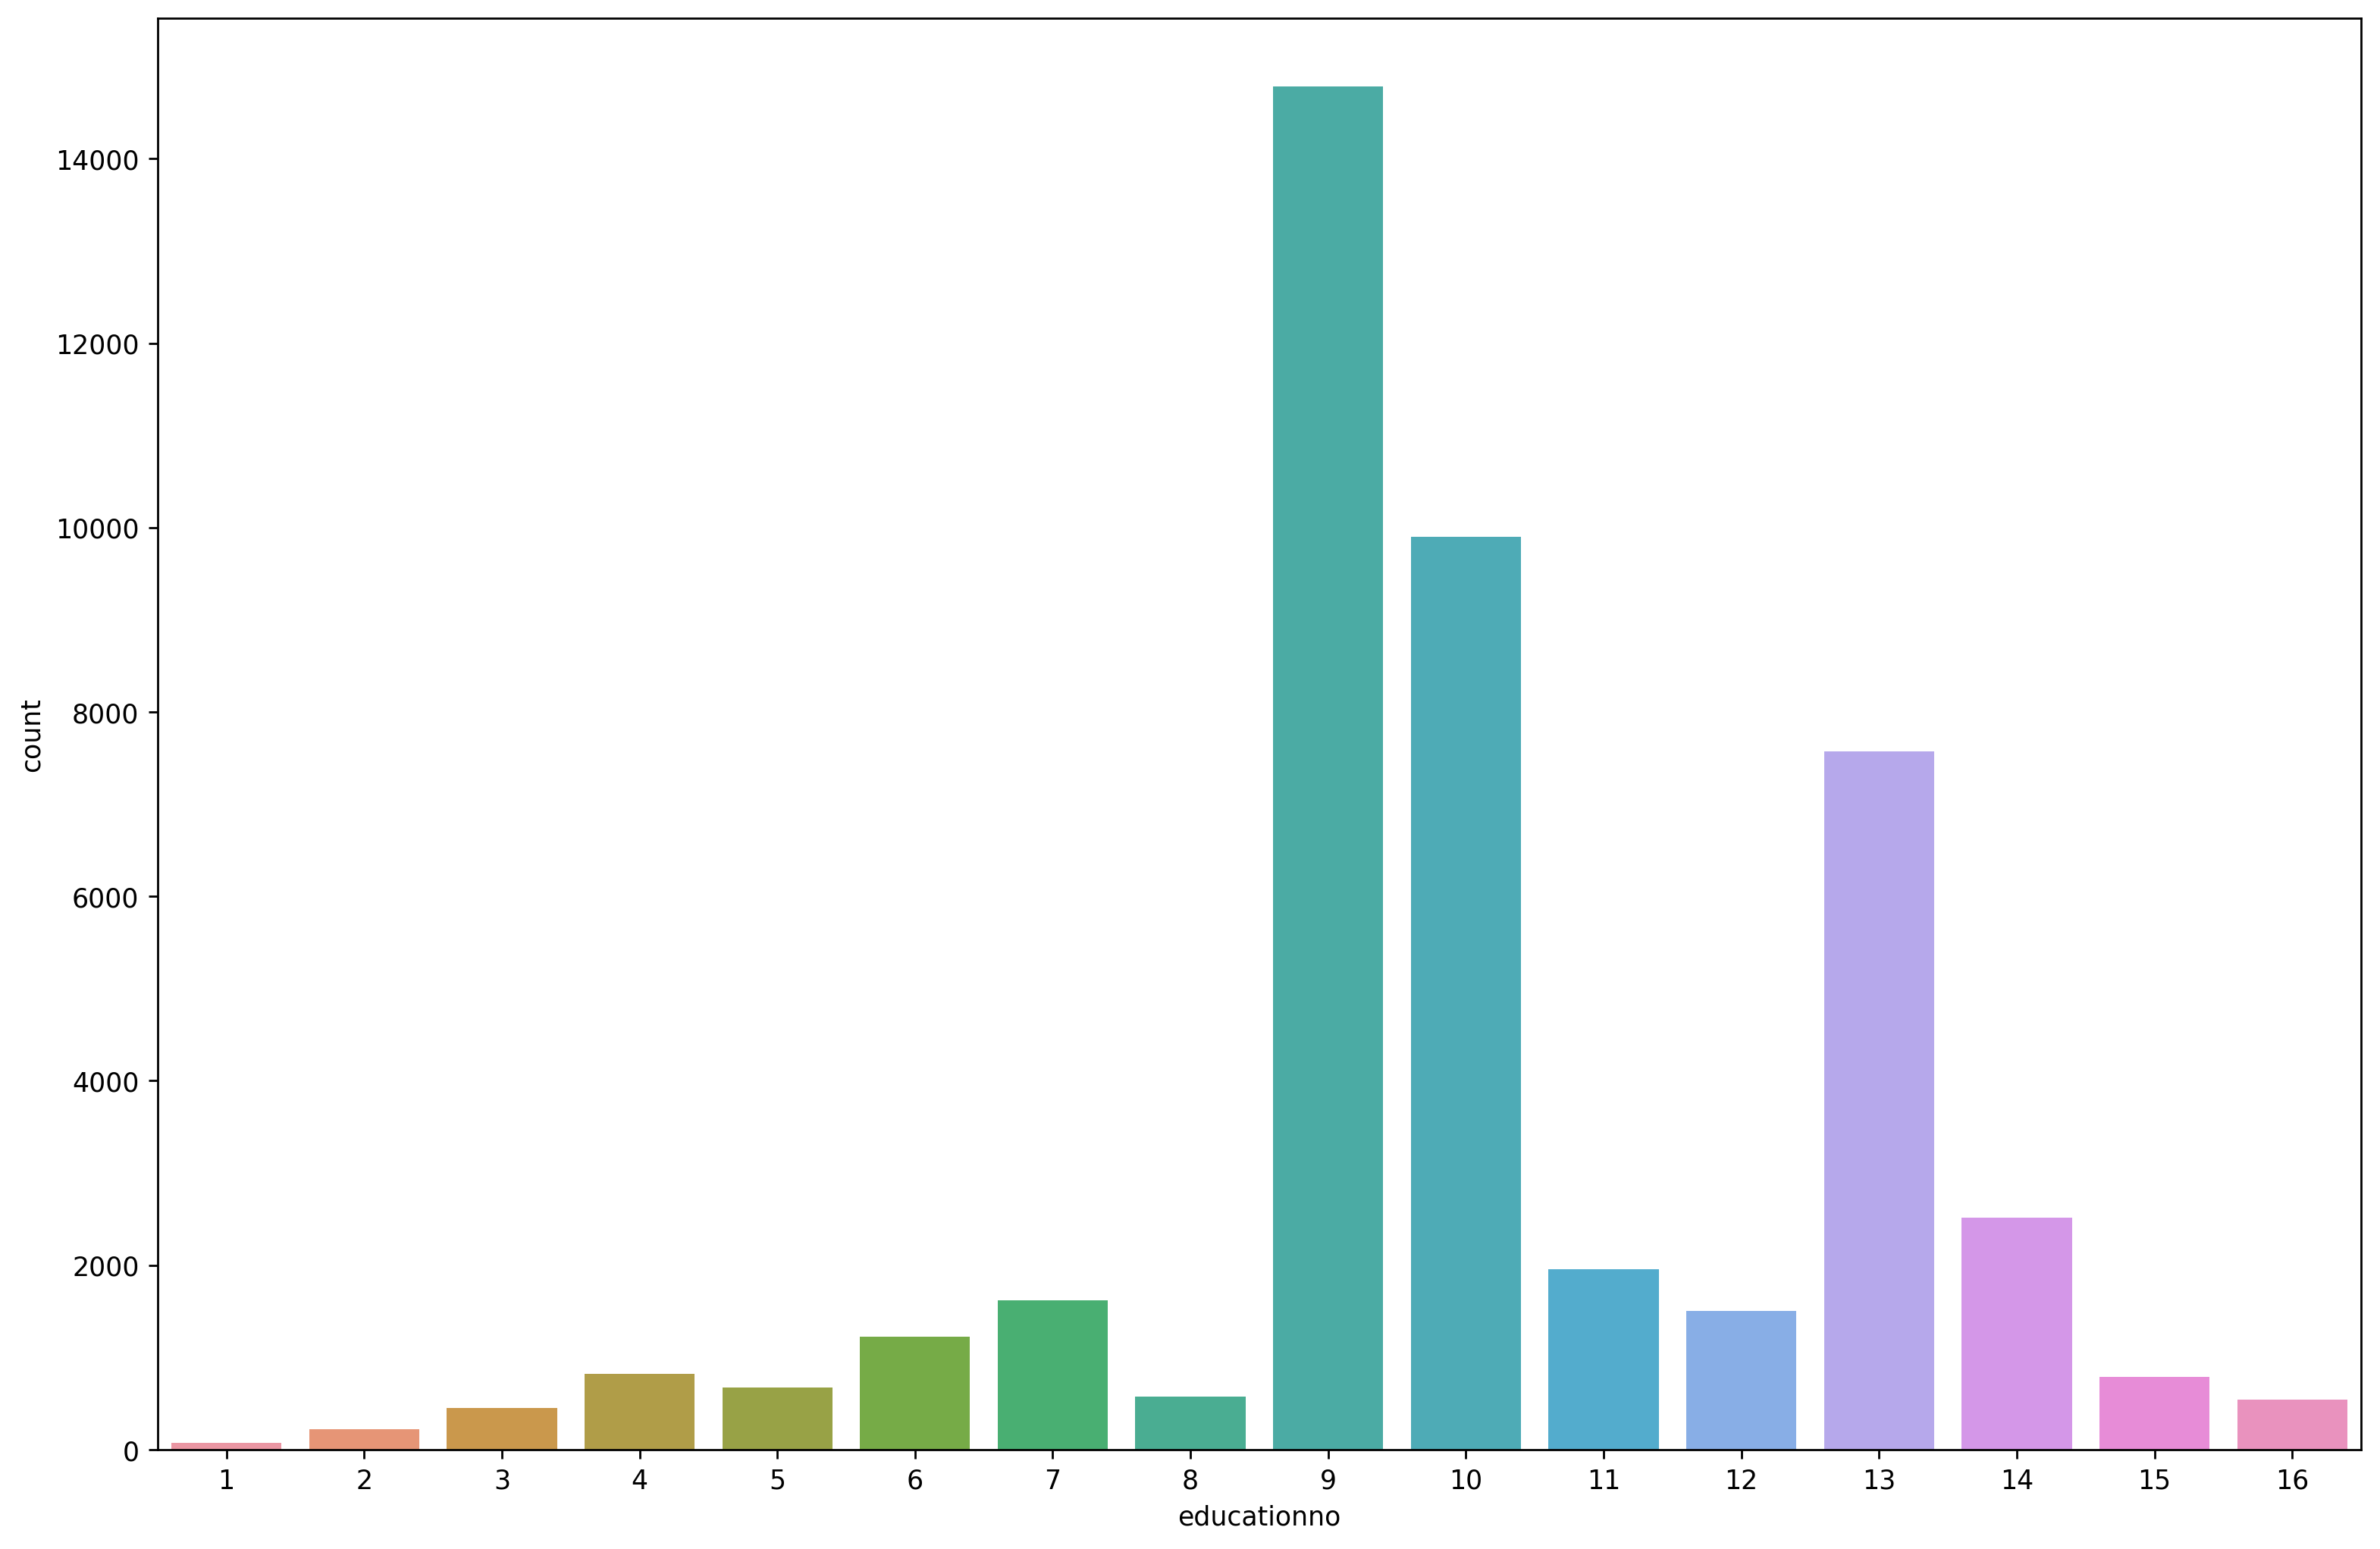

In [44]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot('educationno',data=salary_data)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

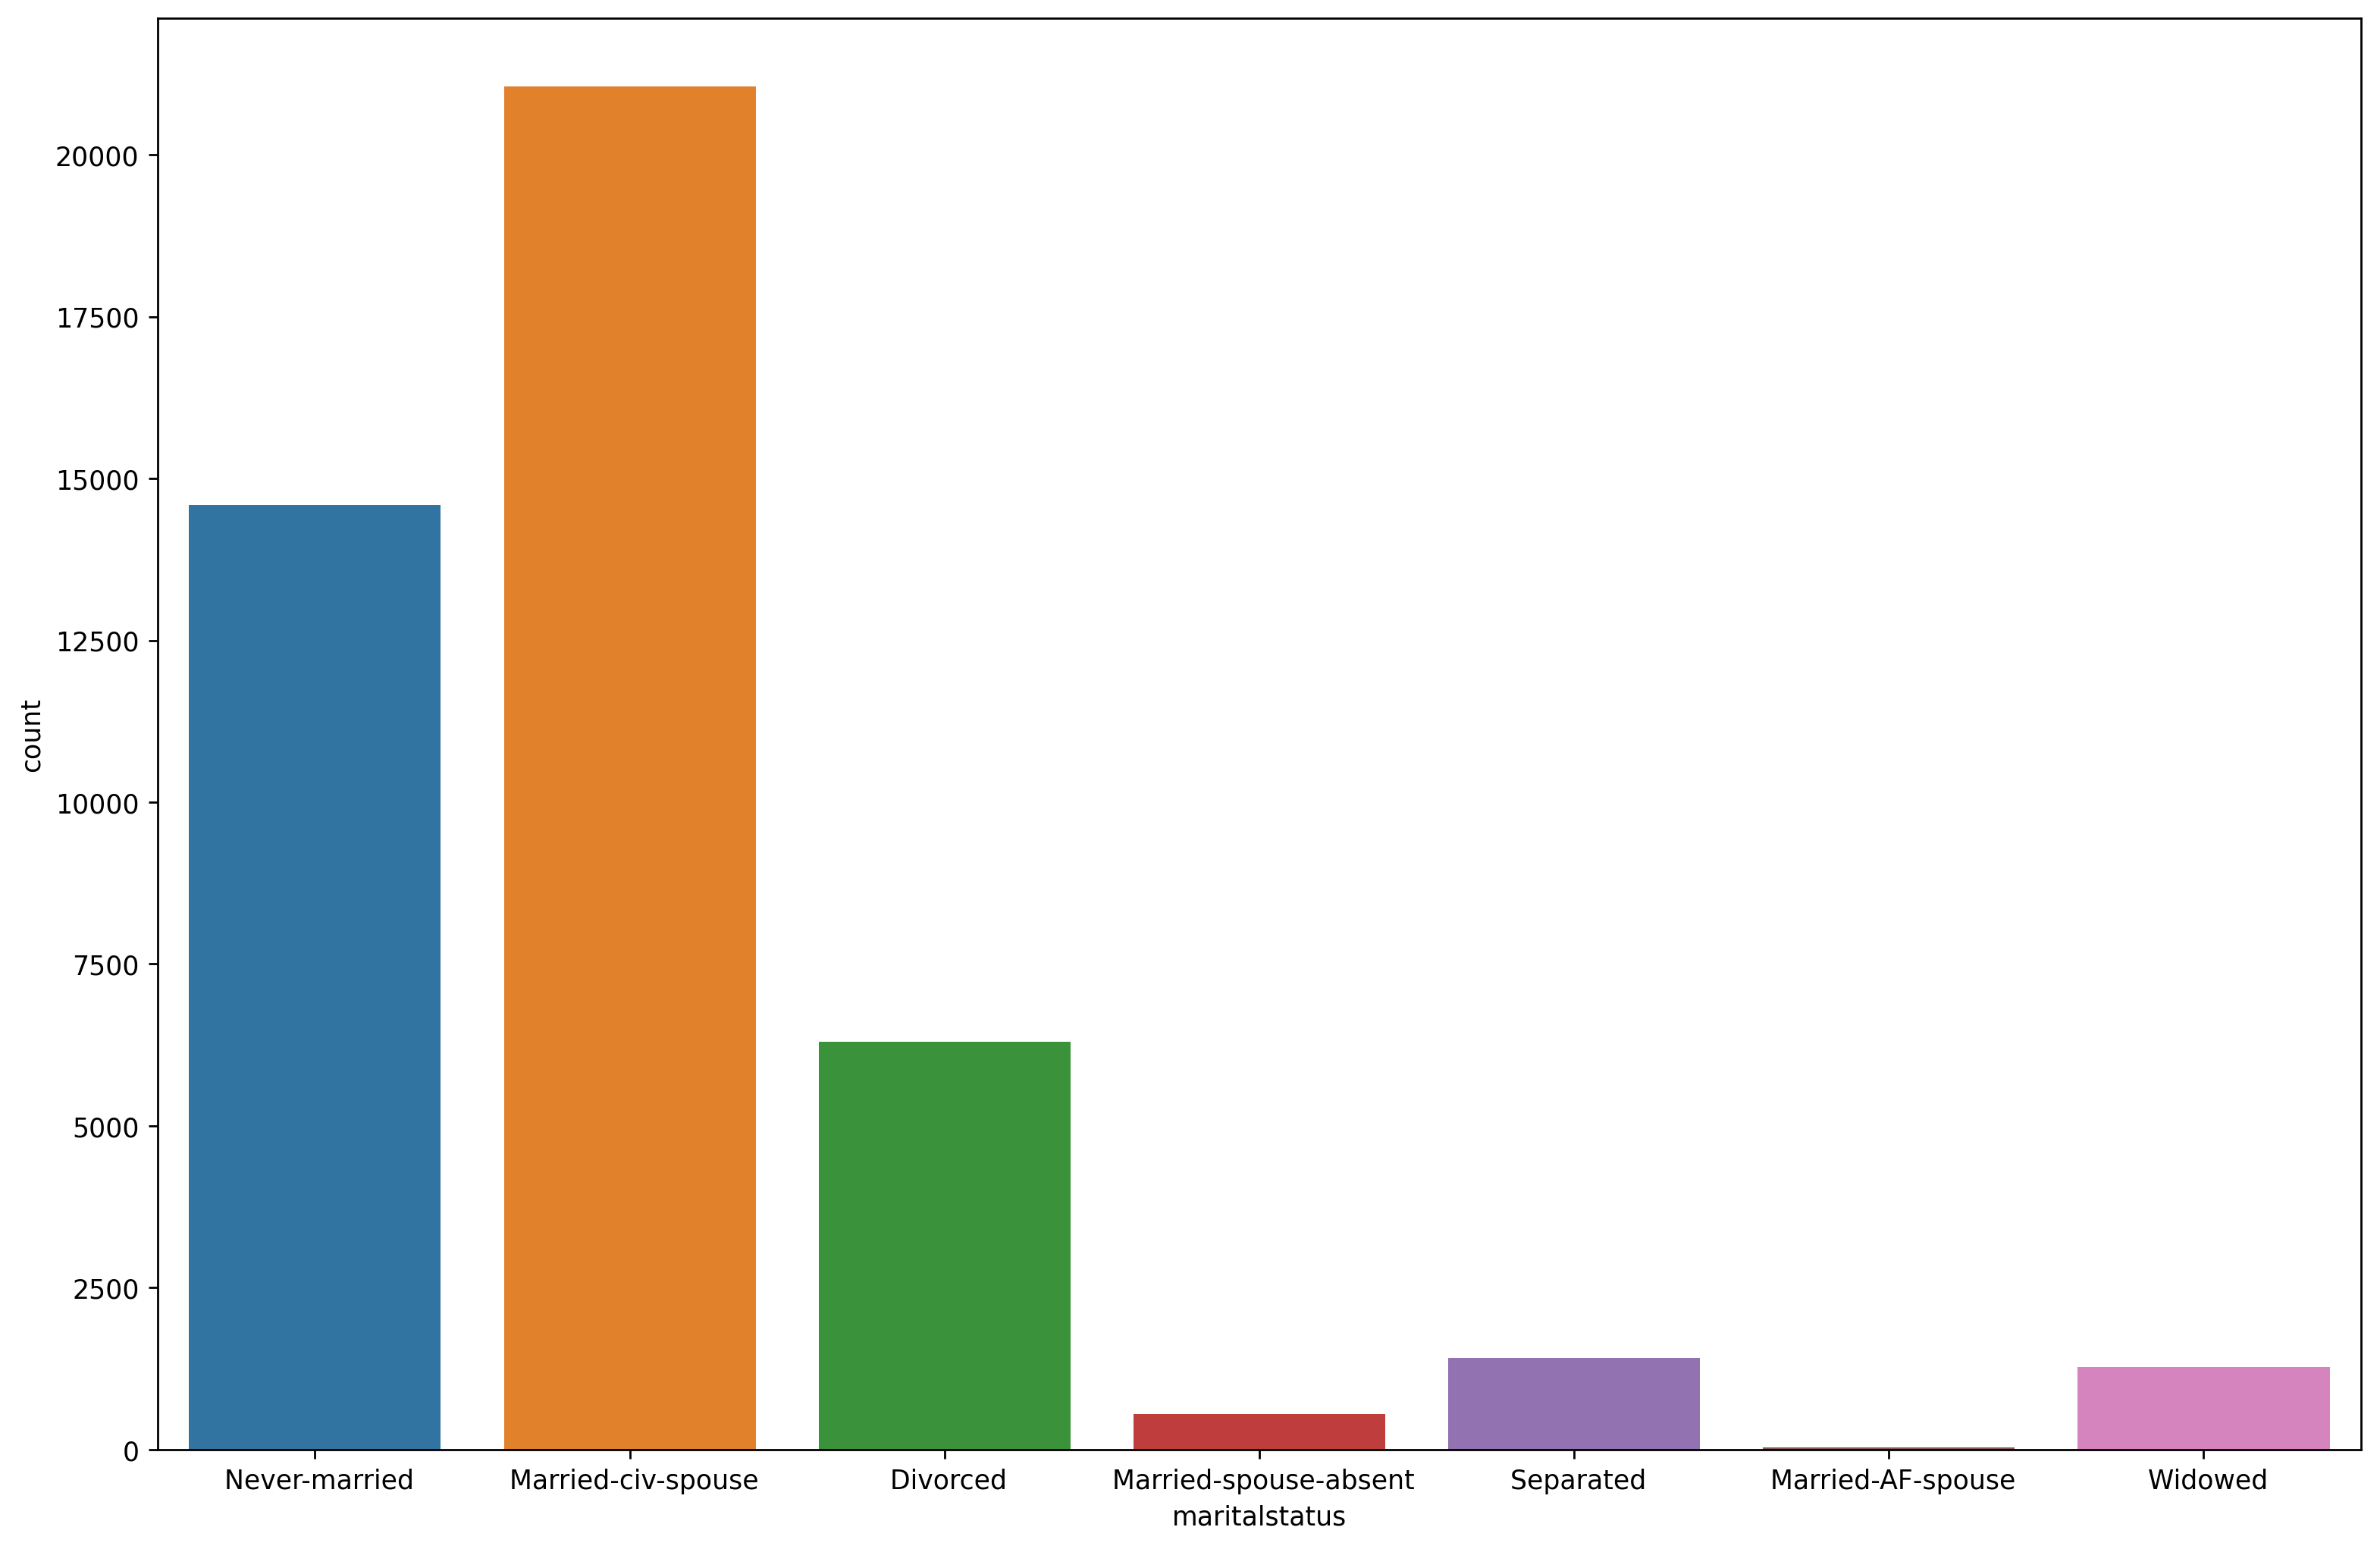

In [45]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot("maritalstatus",data=salary_data)

<AxesSubplot:xlabel='occupation', ylabel='count'>

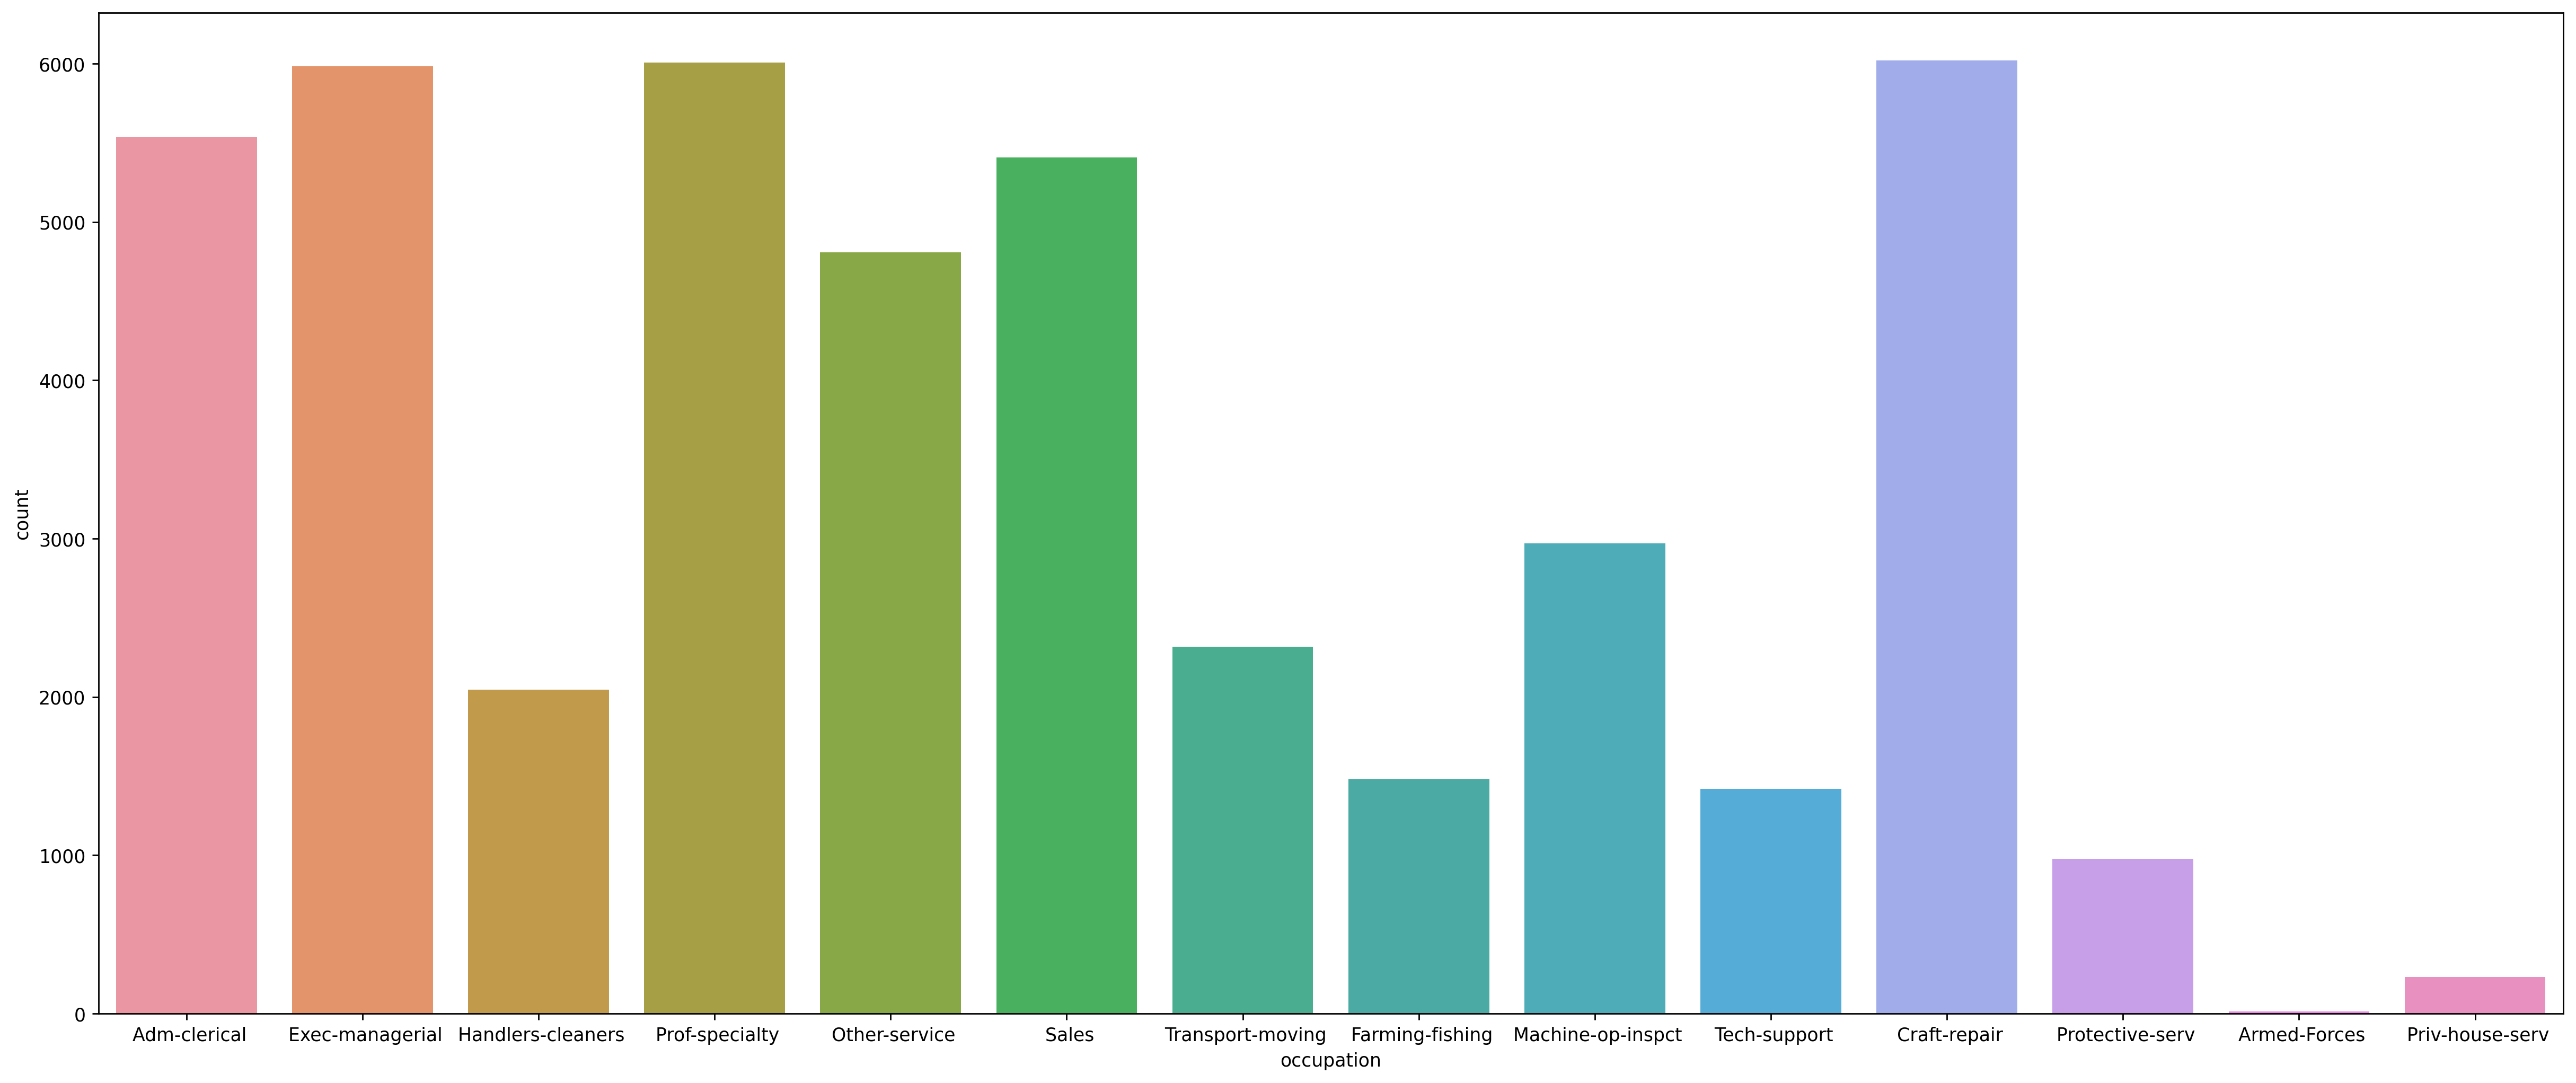

In [46]:
plt.figure(figsize=(24,10),dpi=250)
sns.countplot("occupation",data=salary_data)

<AxesSubplot:xlabel='relationship', ylabel='count'>

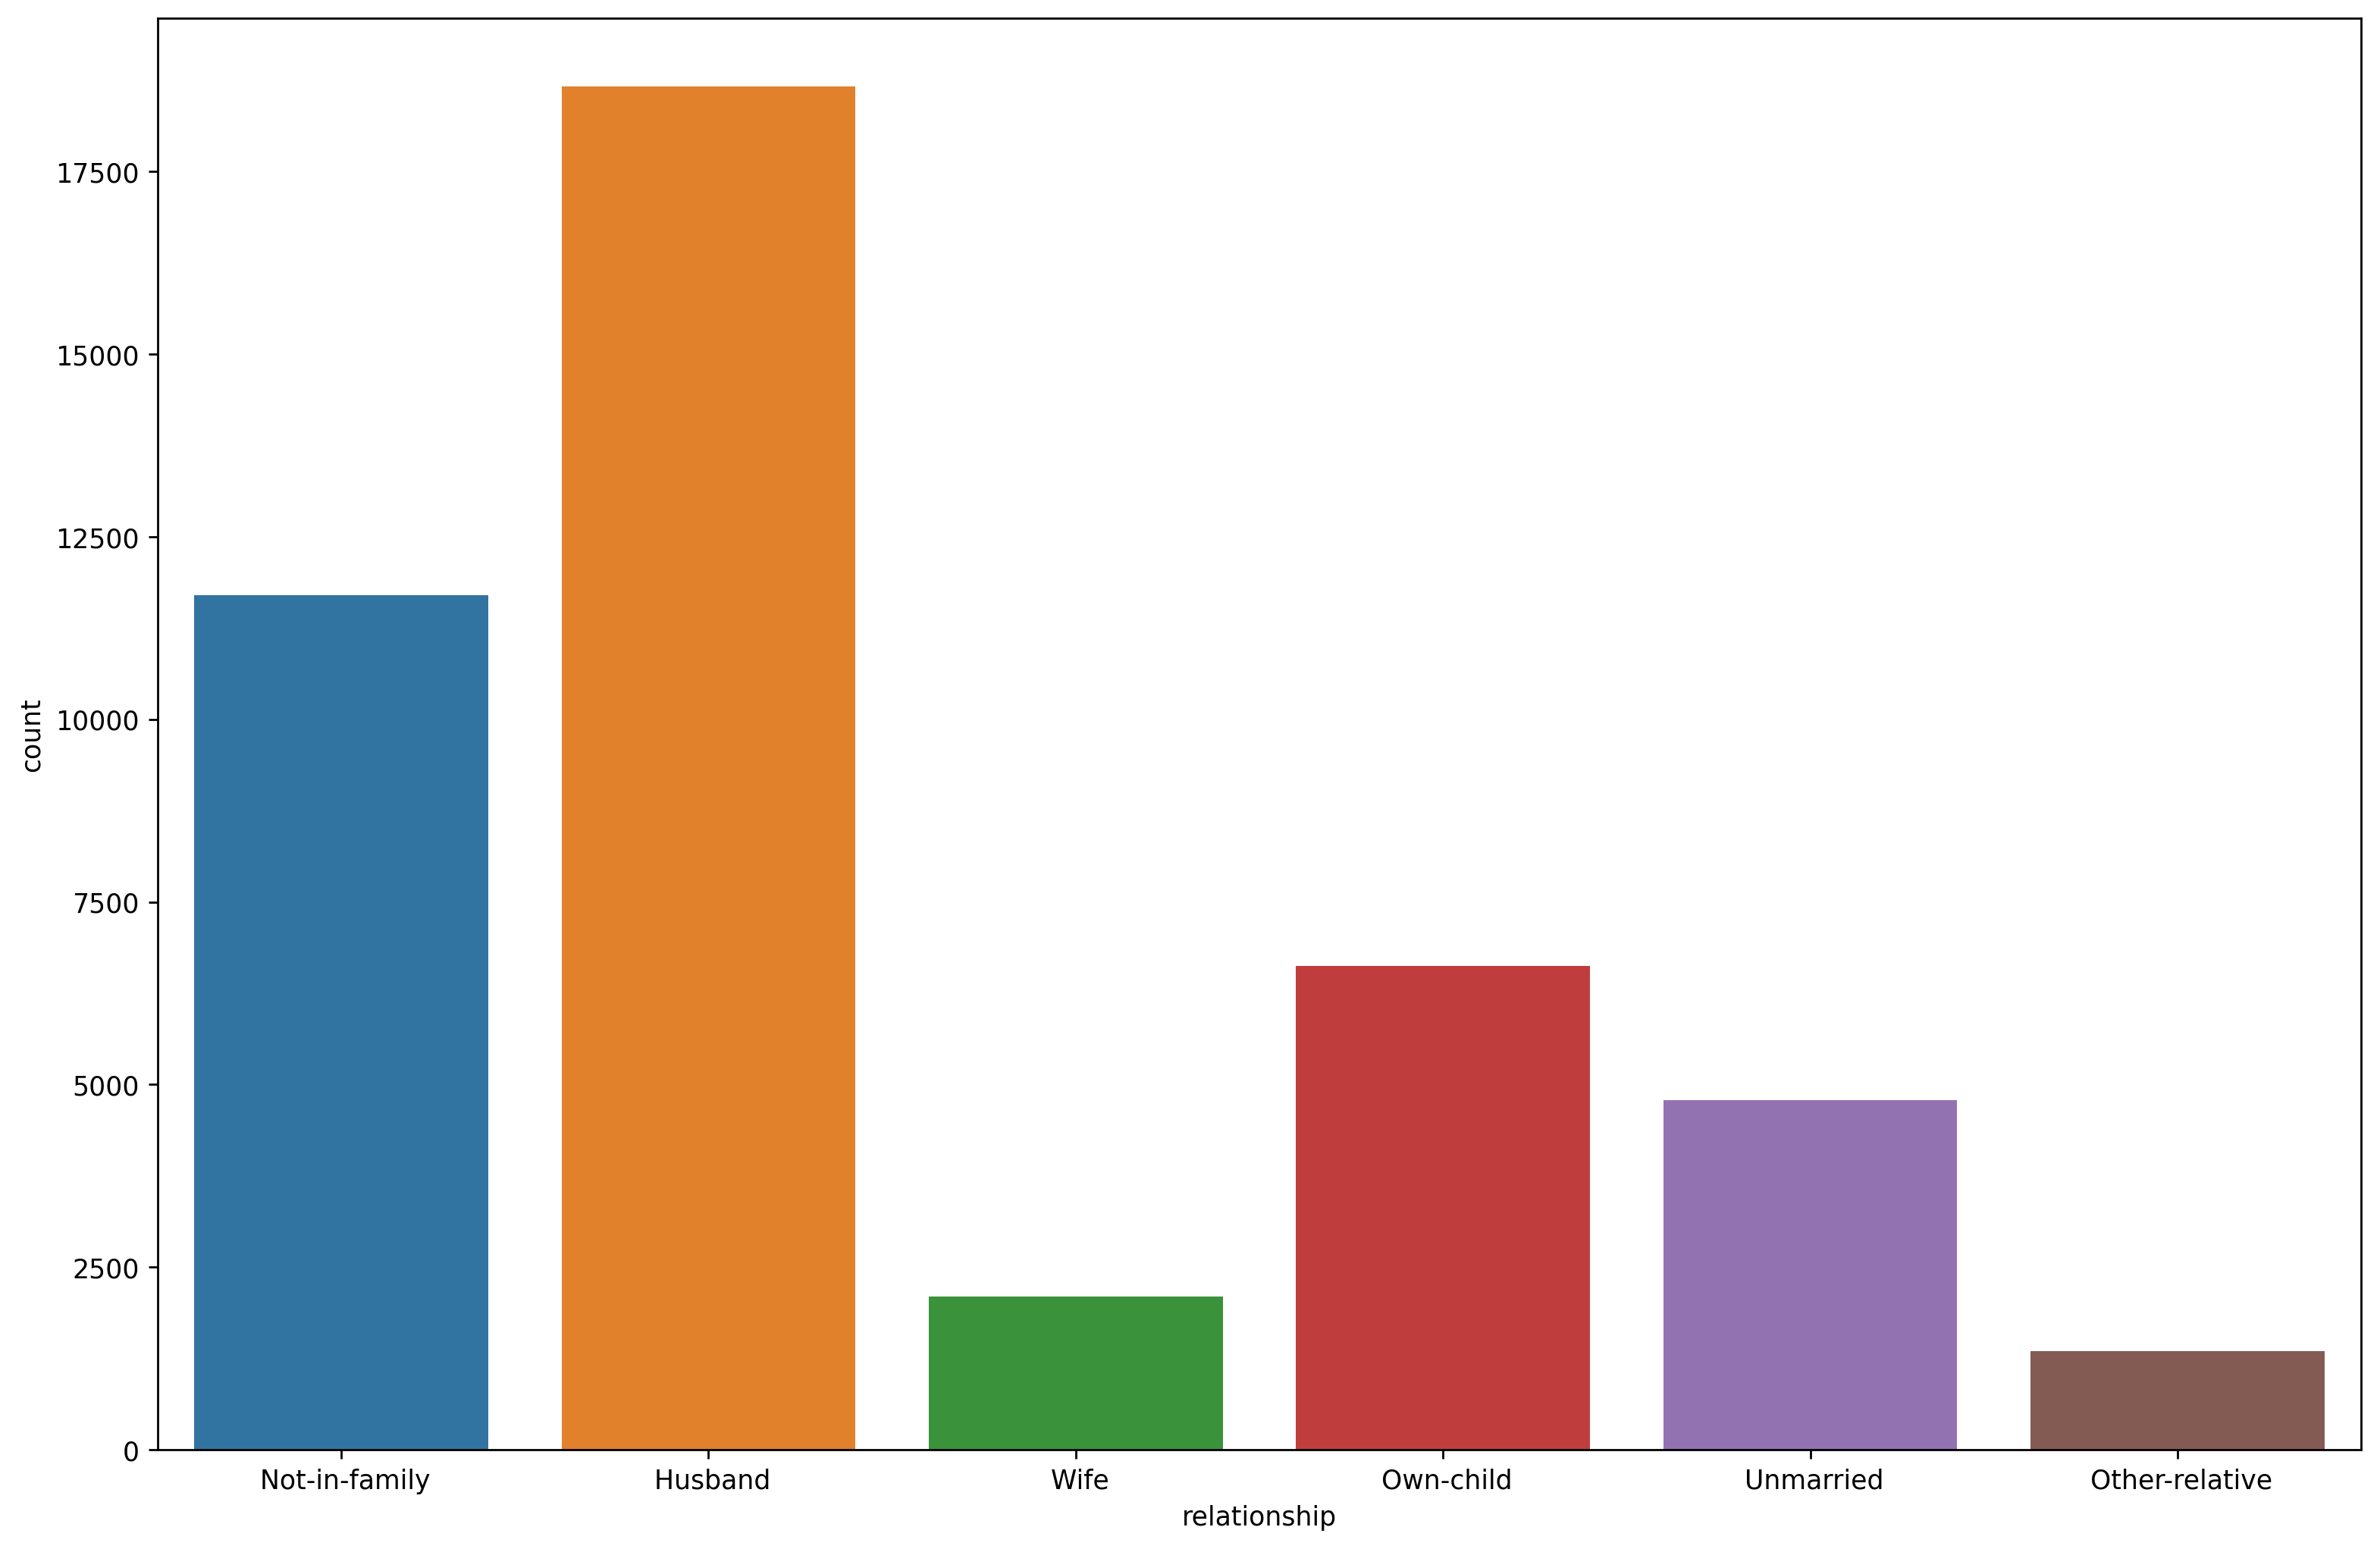

In [47]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot('relationship',data=salary_data)

<AxesSubplot:xlabel='race', ylabel='count'>

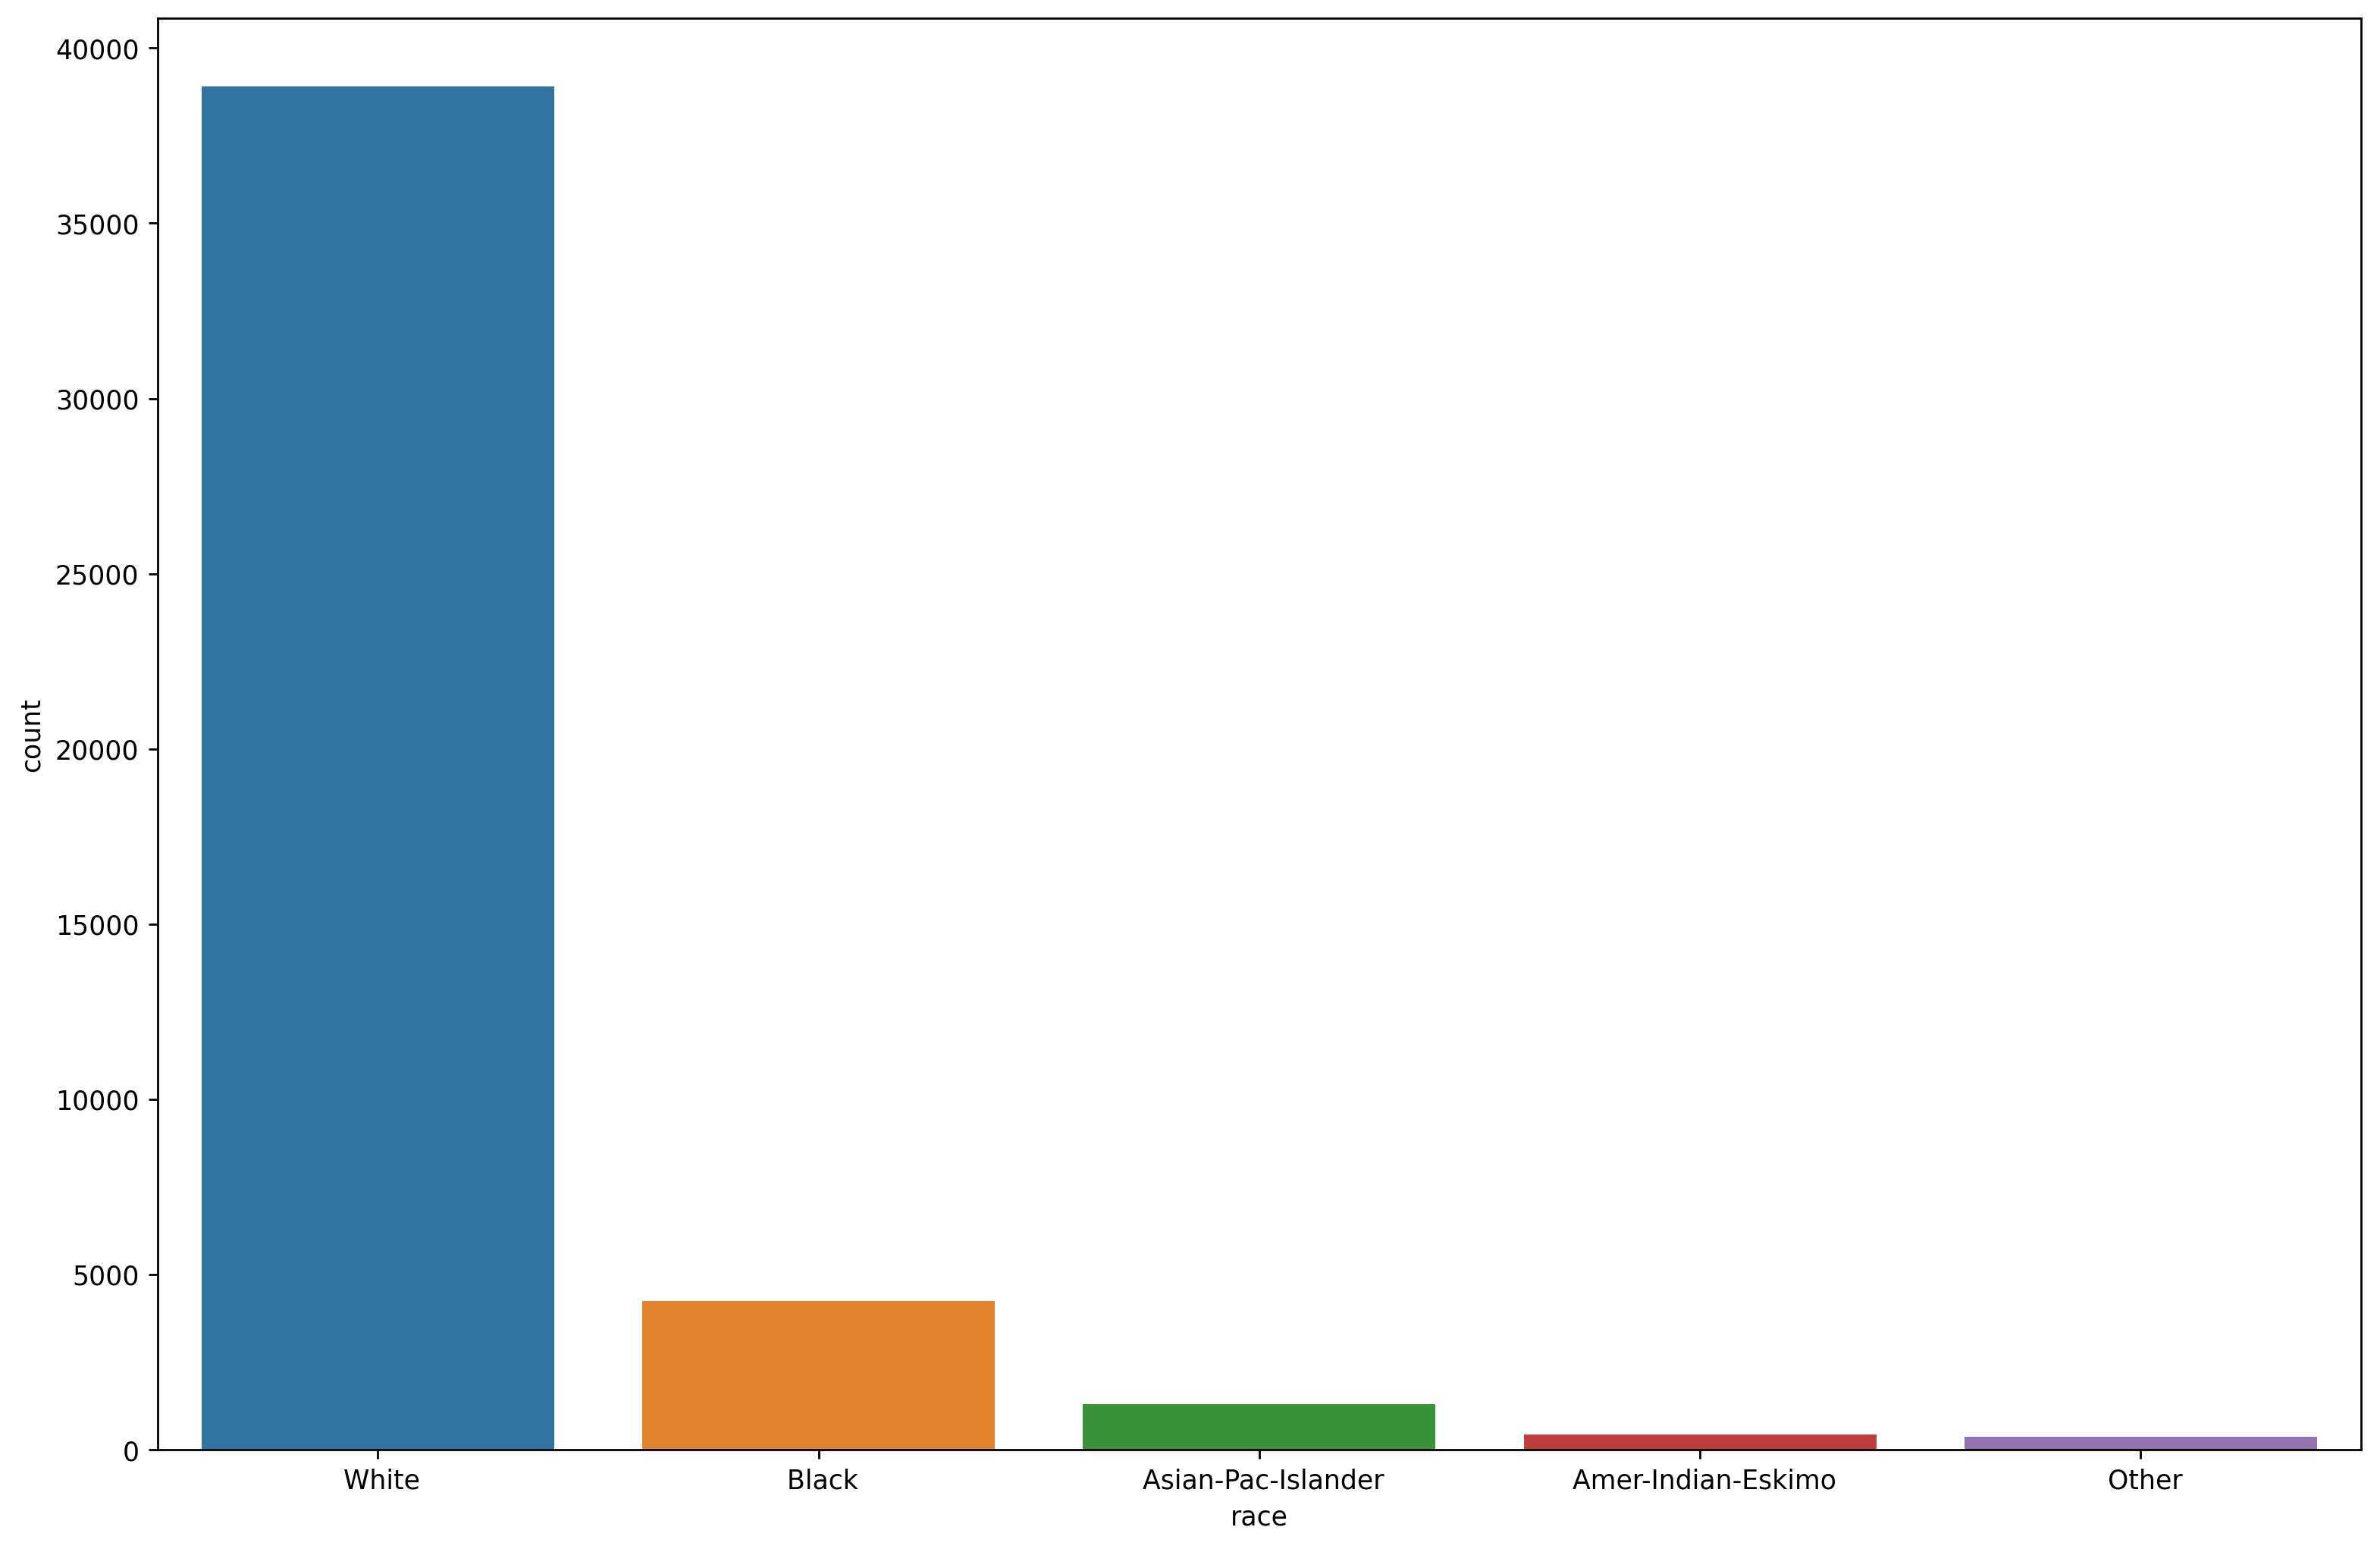

In [48]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot("race",data=salary_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

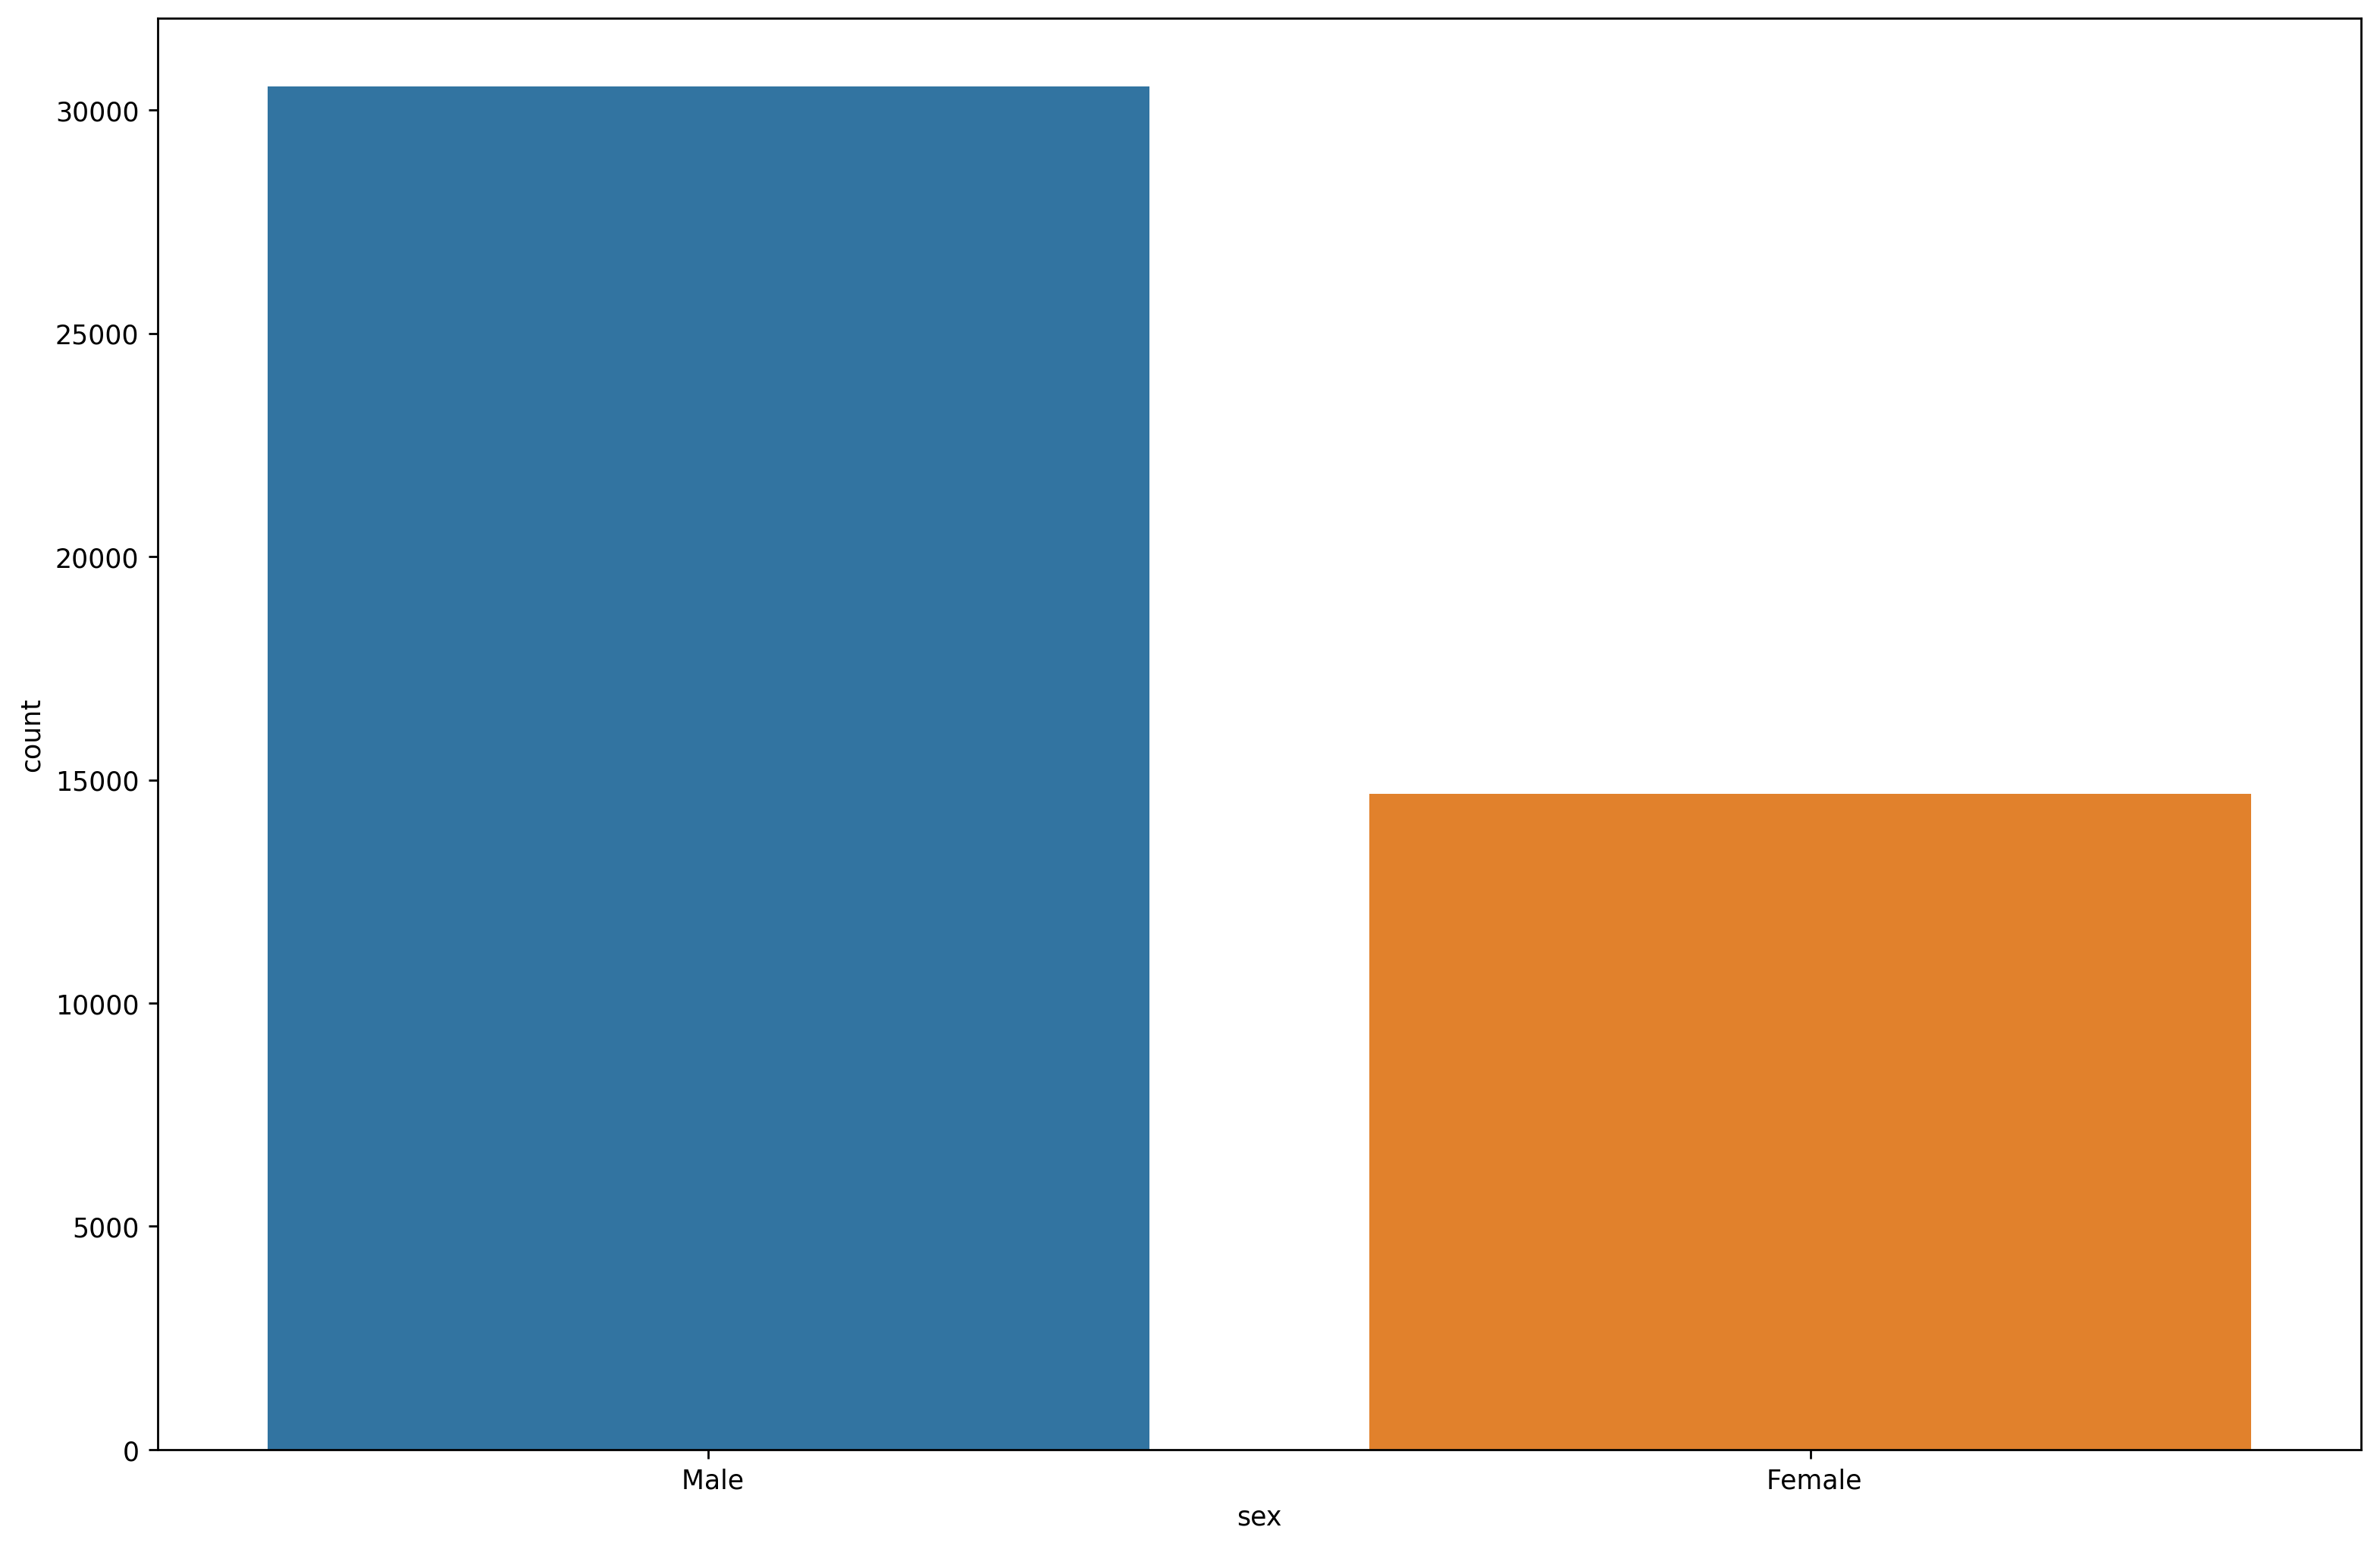

In [49]:
plt.figure(figsize=(15,10),dpi=250)
sns.countplot("sex",data=salary_data)

<AxesSubplot:xlabel='hoursperweek', ylabel='count'>

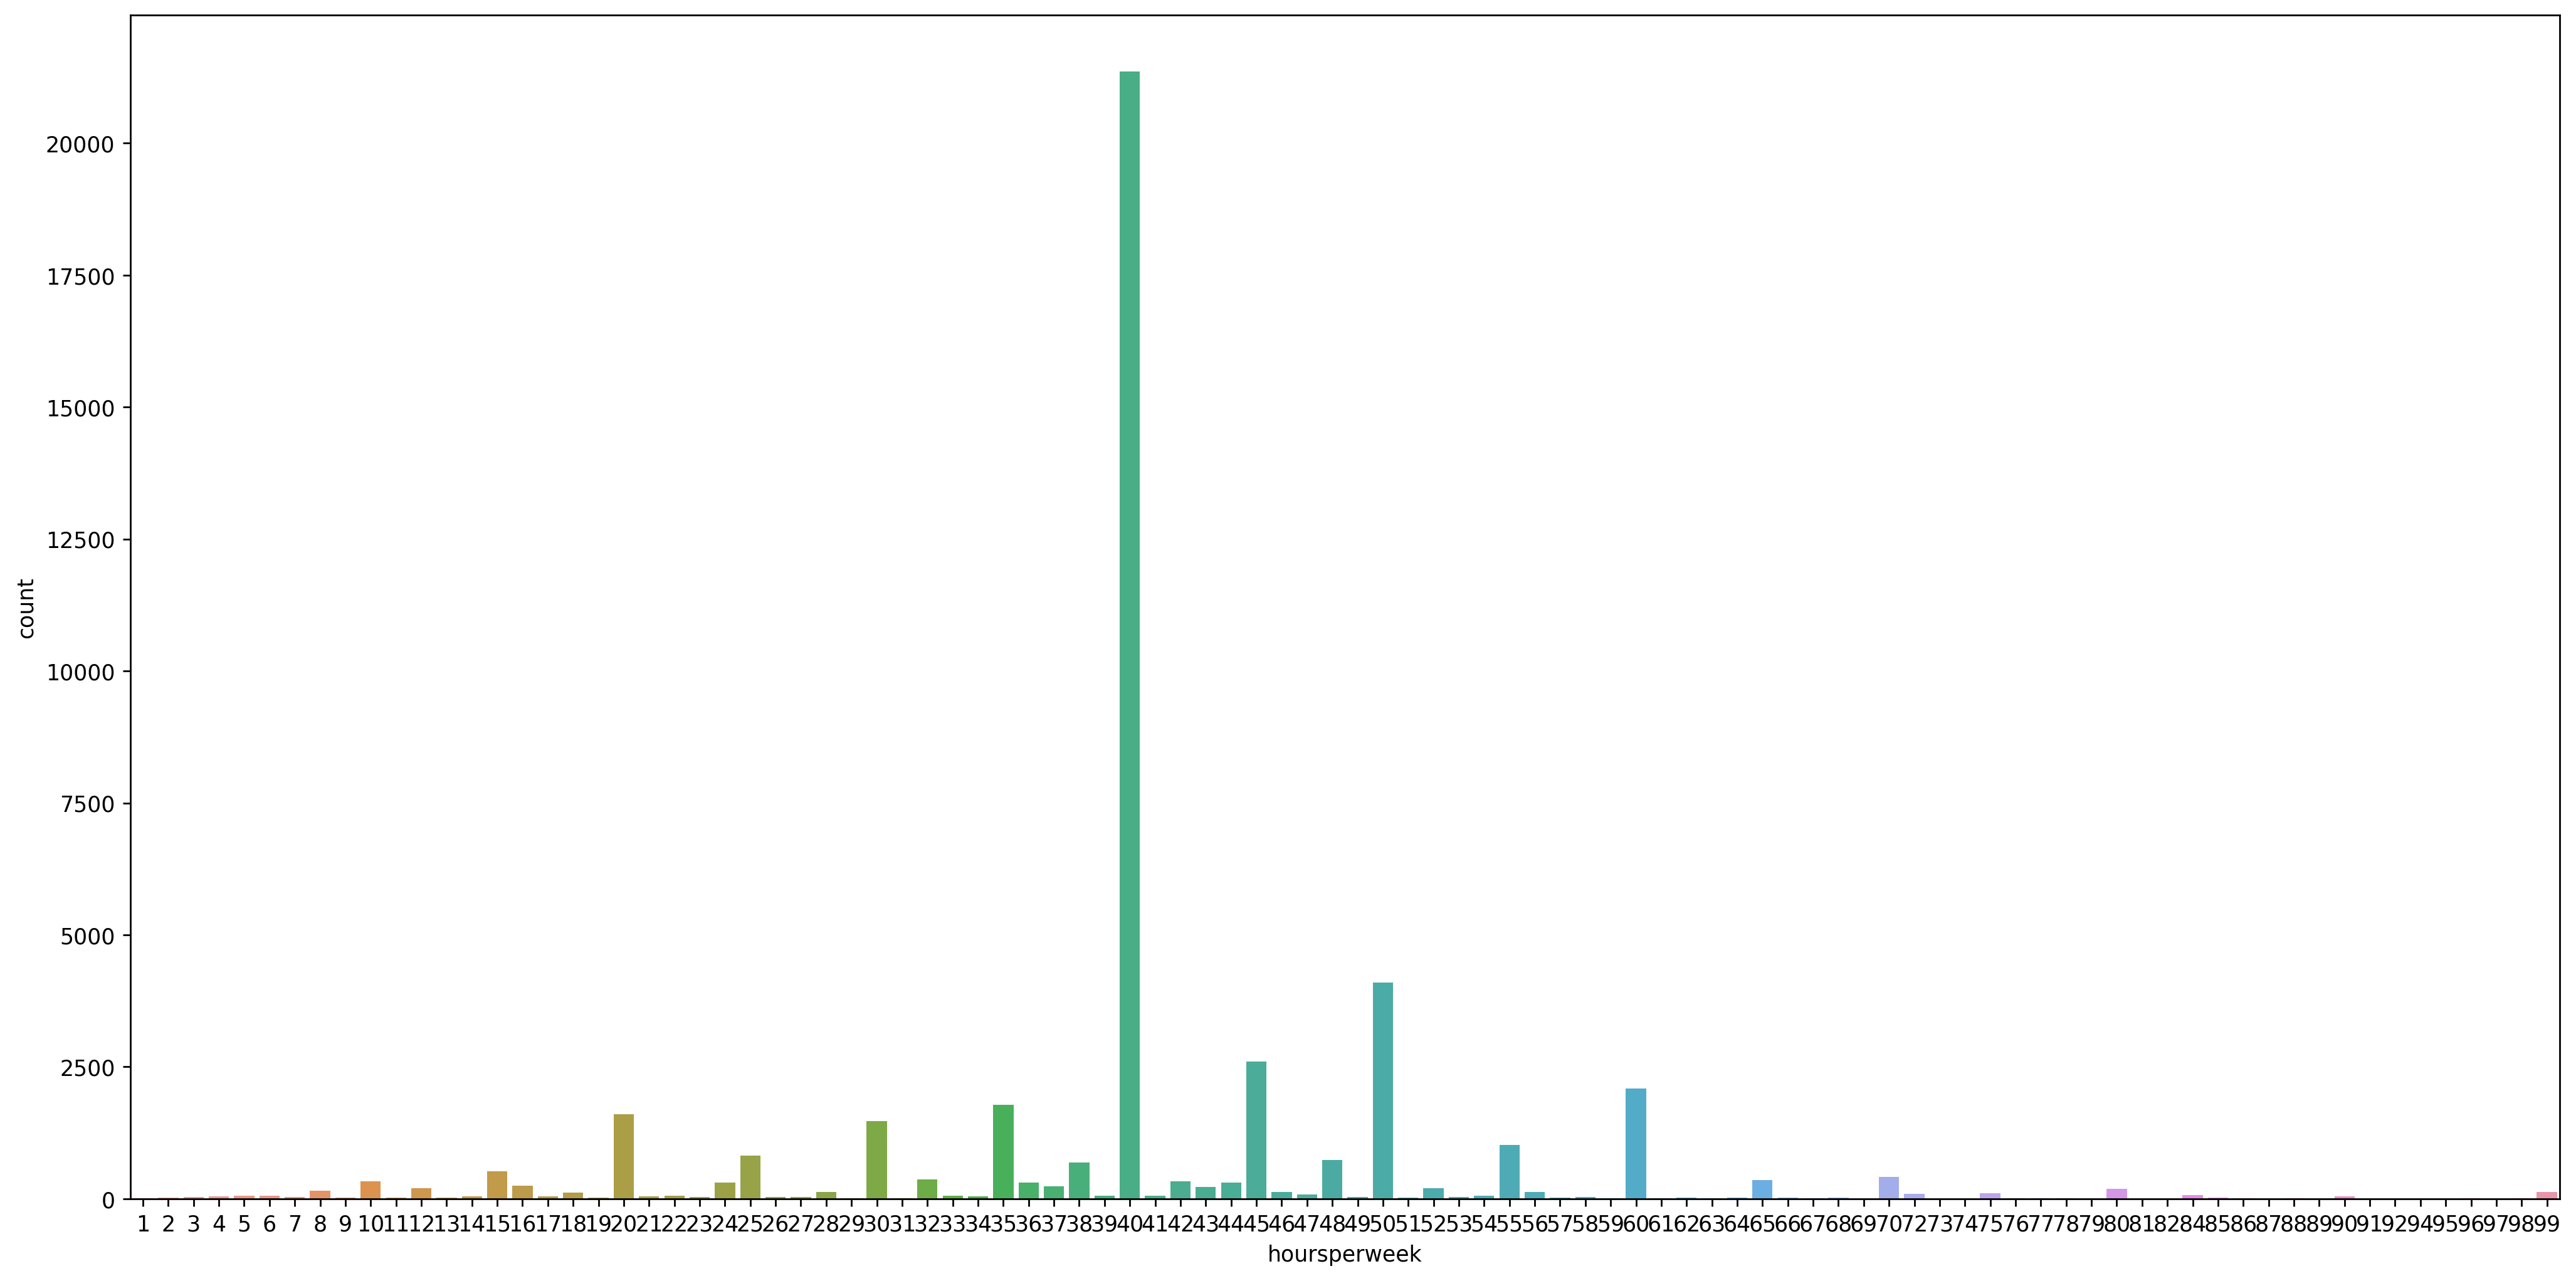

In [50]:
plt.figure(figsize=(20,10),dpi=250)
sns.countplot("hoursperweek",data=salary_data)

In [51]:
salary_data["native"].value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

# Piechart

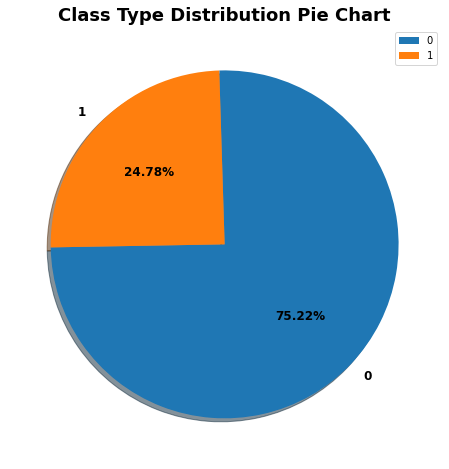

In [52]:
plt.figure(figsize = (12,8))
plt.pie(salary_data['Salary'].value_counts(),
       labels=salary_data.Salary.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Observation:
As we can see that the majority of tha salaries are more than 50k

# Coverting Categorical data into Numeric Data

In [53]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [54]:
salary_data["education"]=encoder.fit_transform(salary_data["education"])
salary_data["workclass"]=encoder.fit_transform(salary_data["workclass"])
salary_data["maritalstatus"]=encoder.fit_transform(salary_data["maritalstatus"])
salary_data["sex"]=encoder.fit_transform(salary_data["sex"])
salary_data["race"]=encoder.fit_transform(salary_data["race"])
salary_data["occupation"]=encoder.fit_transform(salary_data["occupation"])
salary_data["relationship"]=encoder.fit_transform(salary_data["relationship"])
salary_data["native"]=encoder.fit_transform(salary_data["native"])

In [55]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Splting into Train and Test Data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=salary_data.iloc[:,0:12]
Y=salary_data[["Salary"]]

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [59]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
26177,47,4,15,10,2,12,0,2,1,0,0,40
14229,48,2,11,9,2,13,0,4,1,0,0,44
9156,44,2,9,13,2,3,0,4,1,0,0,40
13466,65,2,11,9,6,7,1,4,0,0,0,15
4245,28,2,7,12,4,9,3,4,1,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
2308,29,2,12,14,4,9,1,4,0,0,0,40
16317,37,4,11,9,2,4,0,4,1,0,0,72
12895,81,4,9,13,6,9,1,4,0,0,1668,3
6012,40,2,11,9,2,11,0,4,1,0,0,40


In [60]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
3125,41,2,4,3,2,0,0,4,1,0,0,40
4589,76,2,6,5,2,10,0,4,1,0,0,13
28875,52,2,9,13,2,3,0,4,1,0,0,45
13296,54,2,11,9,2,6,0,4,1,0,0,40
13076,40,2,14,15,4,9,1,4,0,14084,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
3628,30,2,11,9,4,6,2,4,0,0,0,35
7307,29,2,11,9,2,3,0,4,1,0,0,40
6011,22,2,11,9,4,0,1,4,0,0,0,10
25704,34,2,11,9,2,2,0,4,1,0,0,50


In [61]:
Y_train

,Salary
26177,1
14229,0
9156,1
13466,0
4245,0
...,...
2308,0
16317,0
12895,0
6012,1


In [62]:
Y_test

,Salary
3125,0
4589,0
28875,1
13296,1
13076,1
...,...
3628,0
7307,0
6011,0
25704,0


# Creating Naive Bayes Model for categorical data

In [63]:
from sklearn.naive_bayes import CategoricalNB

In [64]:
cnb = CategoricalNB()

In [65]:
cnb.fit(X_train,Y_train)

CategoricalNB()

In [66]:
predict = cnb.predict(X_test)
pd.Series(predict).value_counts()

0    7025
1    2020
dtype: int64

# Checking accuracy_score,Connfusion_matrix and Classification_report

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
accuracy_score(Y_test,predict)

0.8556108347153123

In [69]:
cm = confusion_matrix(Y_test,predict)
cm

array([[6278,  559],
       [ 747, 1461]], dtype=int64)

Text(33.0, 0.5, 'Truth')

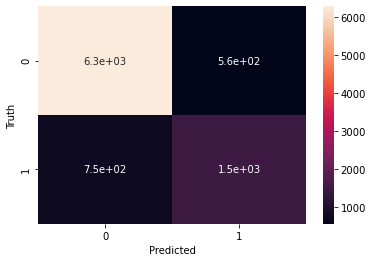

In [70]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [71]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6837
           1       0.72      0.66      0.69      2208

    accuracy                           0.86      9045
   macro avg       0.81      0.79      0.80      9045
weighted avg       0.85      0.86      0.85      9045



# Creating ROC Curve

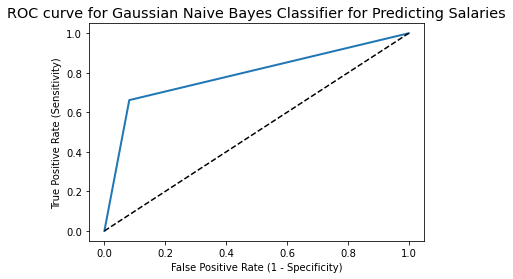

In [72]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, predict)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Checkiing ROC-AUC Scores

In [73]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, predict)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7900
